<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Networkx dataset examples

---

Appart from functions for generating particular types of graphs, Networkx contains several benchmark social network datasets.

### 1. Zachary's Karate Club graph: 


[Zachary's Karate Club](https://www.jstor.org/stable/3629752?seq=1#page_scan_tab_contents) graph is a result of a social science field study recording if 34 members of a Californian Karate Club were interacting outside the club. It is a benchmark for detecting communities in graphs as during the study a conflict between the administrator and the instructor of the club lead to a split with some members forming a new club.

If you are the first to mention this dataset on a network conference, you can win a trophy and become a member of the *Zachary Karate Club Club*:

<img src="../assets/images/Karate_Club_Trophy.jpg" style="width:500px;height:400px;">

### 2. The Florentine family graph: 

This is data about how the most important Florentine families in the early 15th century were connected by marriages among the families (Ronald L. Breiger and Philippa E. Pattison Cumulated social roles: The duality of persons and their algebras,1 Social Networks, Volume 8, Issue 3, September 1986, Pages 215-256). In fact, the time covered is just around the time that the Medici family had been expelled from Florence before returning to power, and the families represented here are known to have shown opposition to the Medici family.

### 3. The Davis Southern Women Graph

This dataset was collected by Davis and Gardner in the 1930s. It contains the observed attendance by 18 Southern women at 14 social events, presumably comparable to modern meet ups (A. Davis, Gardner, B. B., Gardner, M. R., 1941. Deep South. University of Chicago Press, Chicago, IL.).

## For each of the graphs, find 

* the graph info
* the list of nodes
* the list of edges
* the degree distribution (plot a histogram)
* the clustering coefficients (for each node and the average, plot a histogram)
* the shortest paths for the nodes and their average length
* obtain the vertex and edge betweenness ranking for each graph
* plot the graph
* use the Girvan-Newman algorithm for community detection
* use hierarchical clustering for community detection
    - do you see any differences in the community structure resulting from the two algorithms?

**Hints:** 
- load the datasets with the commands below
- the last graph is bipartite - obtain the clustering coefficients and shortest paths for the projections on top and bottom nodes
- for the Karate club graph, hierarchical clustering with two clusters should give you communities representing the actual split that occured in the group
- for the bipartite graph, consider communities of the whole graph and the graphs obtained by projecting on the two groups

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import networkx as nx
from networkx.algorithms import bipartite
from scipy.cluster import hierarchy
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist, cosine, jaccard
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings.simplefilter('ignore')

In [2]:
import operator


def Girvan_Newman(G_1):
    G = G_1.copy()
    pos = nx.drawing.spring_layout(G)
    sorted_bc = [1]
    actual_number_components = 1
    while not sorted_bc == []:
        d_edge = nx.edge_betweenness_centrality(G)
        sorted_bc = sorted(list(d_edge.items()), key=operator.itemgetter(1))
        e = sorted_bc.pop()
        print("deleting edge:", e[0], end=' ')
        G.remove_edge(*e[0])
        num_comp = nx.number_connected_components(G)
        print("...we have now ", num_comp, " components")
        if num_comp > actual_number_components:
            actual_number_components = num_comp
            if num_comp < 7:
                nx.draw(G, pos, with_labels=True)
                plt.show()

In [3]:
def hierarchical_clustering(G_1, maxclust=2):
    G = G_1.copy()
    A = nx.adjacency_matrix(G).toarray()
    dist_out = pdist(A, metric='cosine')
    Z = hierarchy.linkage(dist_out, method='average')
    hierarchy.dendrogram(Z, leaf_rotation=90)
    plt.show()

    np.random.seed(100)
    clusters = hierarchy.fcluster(Z, maxclust, criterion='maxclust')
    dict_cluster = dict(list(zip(G.nodes(), clusters)))

    colors = ['red', 'blue', 'green', 'yellow', 'orange', 'black']
    node_colors = []
    for key in dict_cluster:
        for i in list(set(dict_cluster.values())):
            if dict_cluster[key] == i:
                node_colors.append(colors[i-1])

    nx.draw_spring(G, node_color=node_colors, with_labels=True)

In [4]:
G_karate = nx.karate_club_graph()
G_florentine = nx.florentine_families_graph()
G_davis = nx.davis_southern_women_graph()

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]
Adjacency matrix:
 [[0 1 1 ... 1 0 0

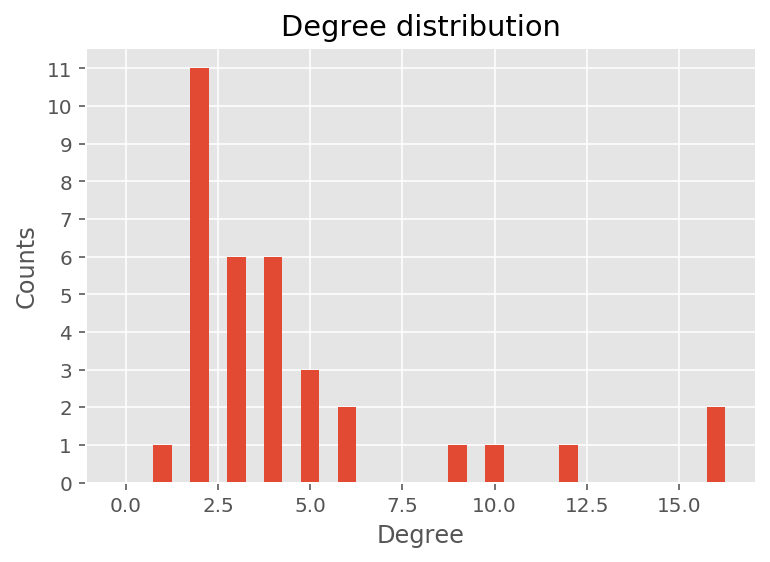

Clustering coefficients: 
{0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}
Average clustering coefficient: 
0.5706384782076823


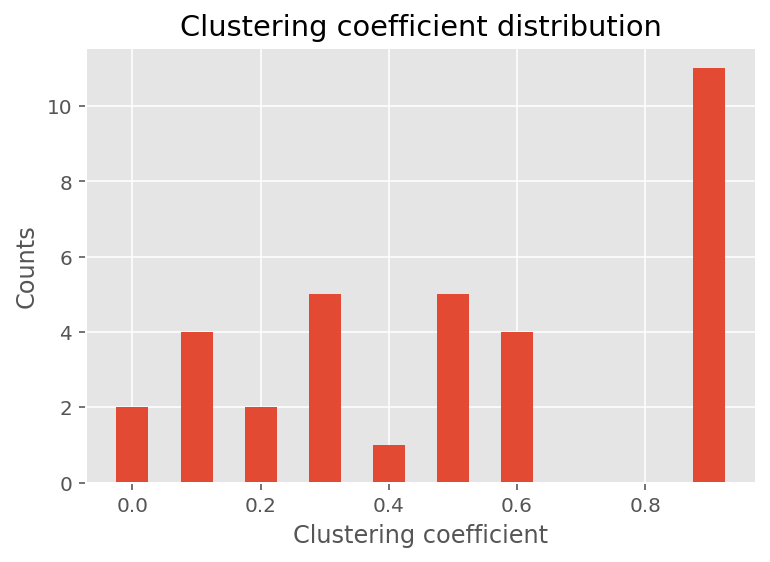

Shortest paths for node 0:
{0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 10: 1, 11: 1, 12: 1, 13: 1, 17: 1, 19: 1, 21: 1, 31: 1, 30: 2, 9: 2, 27: 2, 28: 2, 32: 2, 16: 2, 33: 2, 24: 2, 25: 2, 23: 3, 14: 3, 15: 3, 18: 3, 20: 3, 22: 3, 29: 3, 26: 3}
Average shortest path length: 2.408199643493761


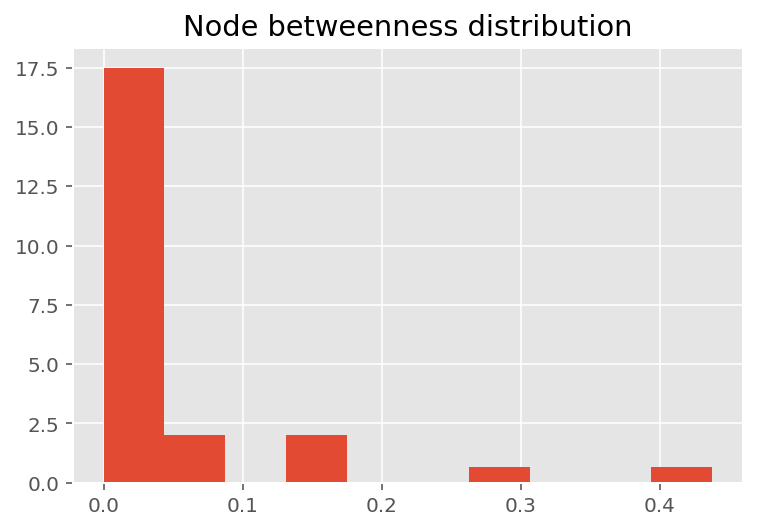

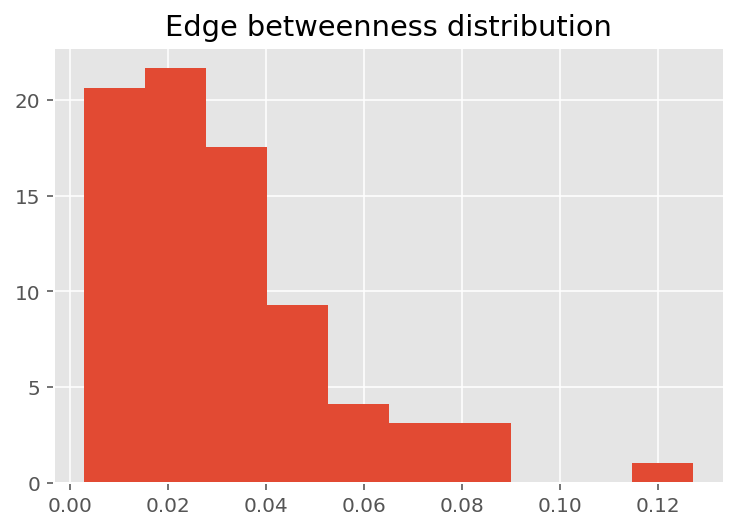

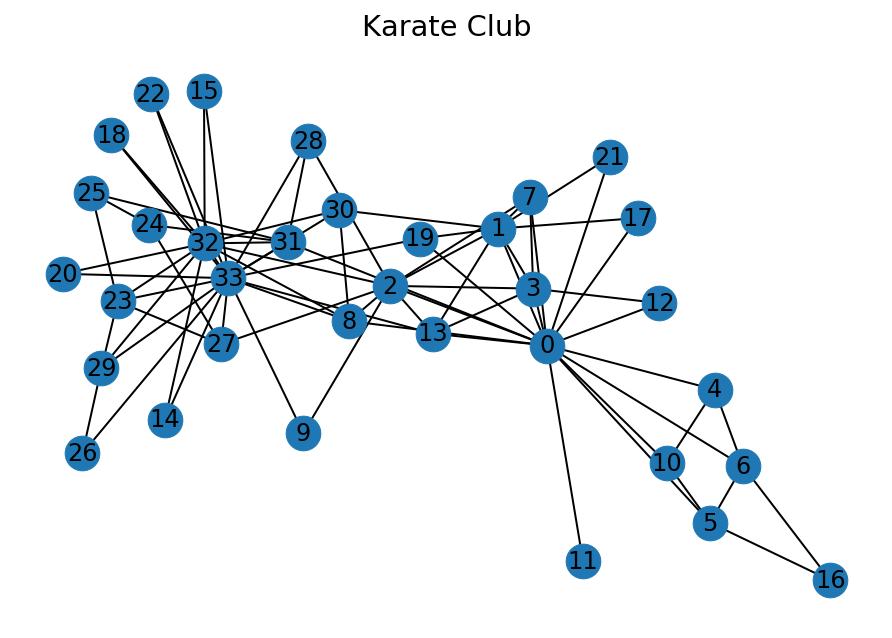

Girvan Newman Algorithm
deleting edge: (0, 31) ...we have now  1  components
deleting edge: (0, 2) ...we have now  1  components
deleting edge: (0, 8) ...we have now  1  components
deleting edge: (13, 33) ...we have now  1  components
deleting edge: (19, 33) ...we have now  1  components
deleting edge: (2, 32) ...we have now  1  components
deleting edge: (1, 30) ...we have now  1  components
deleting edge: (1, 2) ...we have now  1  components
deleting edge: (2, 3) ...we have now  1  components
deleting edge: (2, 13) ...we have now  1  components
deleting edge: (2, 7) ...we have now  2  components


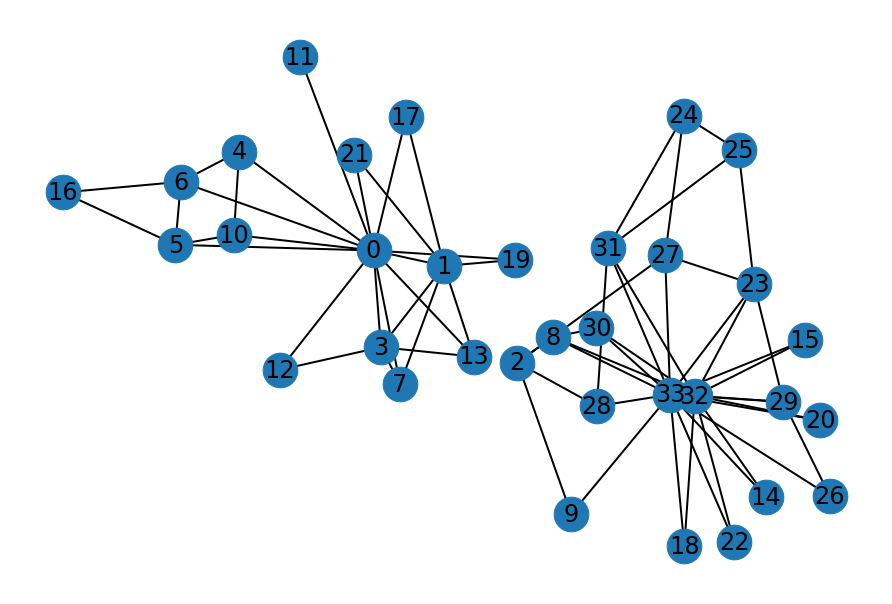

deleting edge: (9, 33) ...we have now  2  components
deleting edge: (27, 33) ...we have now  2  components
deleting edge: (2, 9) ...we have now  3  components


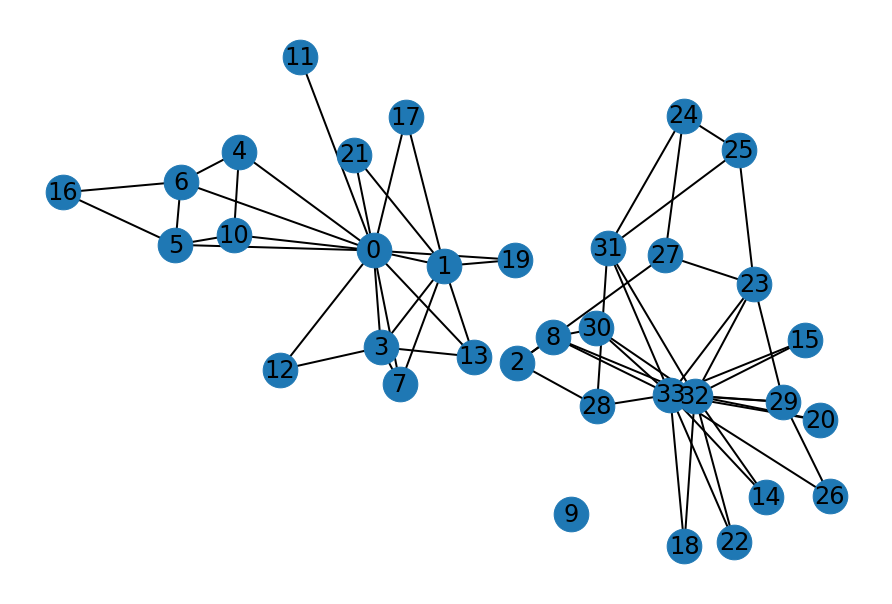

deleting edge: (0, 6) ...we have now  3  components
deleting edge: (0, 5) ...we have now  3  components
deleting edge: (0, 10) ...we have now  3  components
deleting edge: (0, 4) ...we have now  4  components


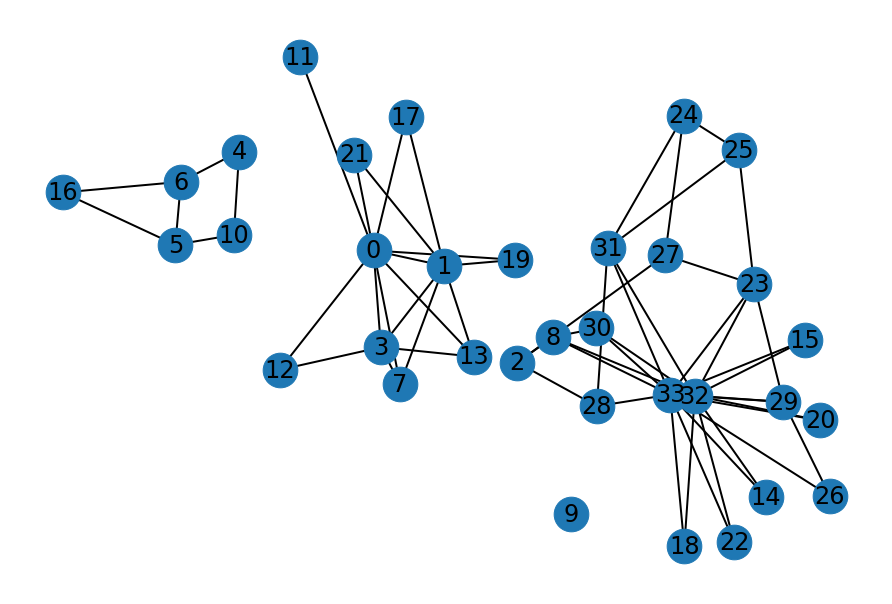

deleting edge: (31, 33) ...we have now  4  components
deleting edge: (31, 32) ...we have now  4  components
deleting edge: (28, 33) ...we have now  4  components
deleting edge: (23, 25) ...we have now  4  components
deleting edge: (23, 27) ...we have now  4  components
deleting edge: (2, 8) ...we have now  5  components


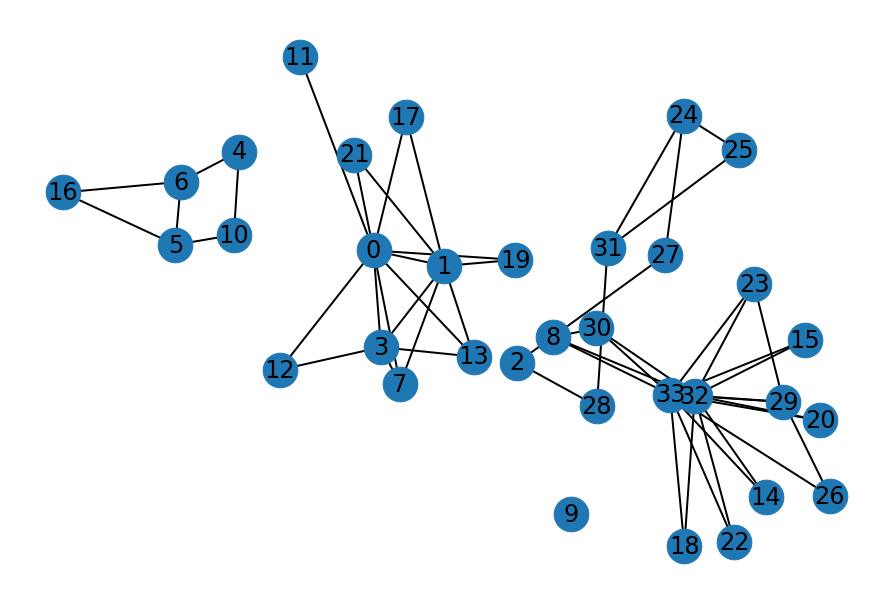

deleting edge: (26, 33) ...we have now  5  components
deleting edge: (26, 29) ...we have now  6  components


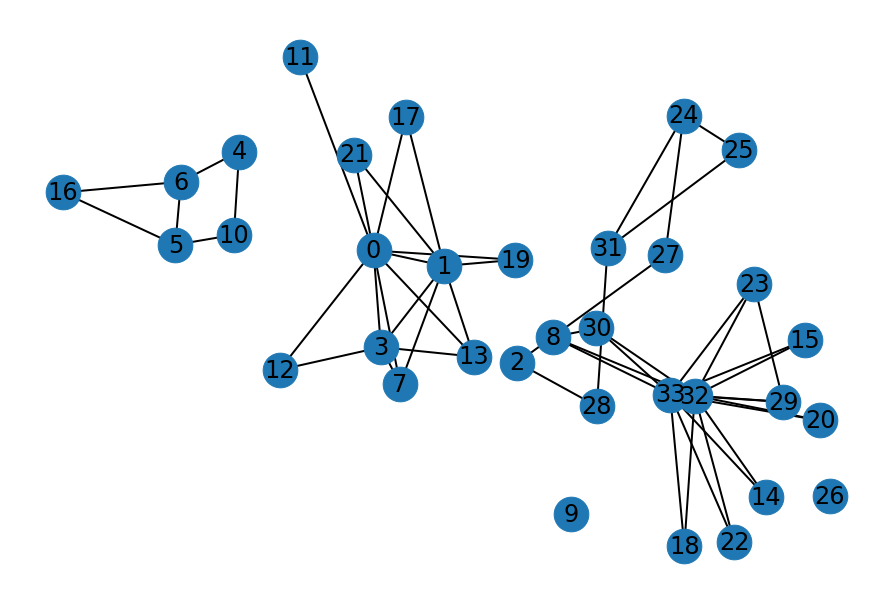

deleting edge: (0, 11) ...we have now  7  components
deleting edge: (0, 12) ...we have now  7  components
deleting edge: (3, 12) ...we have now  8  components
deleting edge: (22, 33) ...we have now  8  components
deleting edge: (22, 32) ...we have now  9  components
deleting edge: (28, 31) ...we have now  9  components
deleting edge: (24, 27) ...we have now  10  components
deleting edge: (20, 33) ...we have now  10  components
deleting edge: (20, 32) ...we have now  11  components
deleting edge: (18, 33) ...we have now  11  components
deleting edge: (18, 32) ...we have now  12  components
deleting edge: (15, 33) ...we have now  12  components
deleting edge: (15, 32) ...we have now  13  components
deleting edge: (1, 21) ...we have now  13  components
deleting edge: (0, 21) ...we have now  14  components
deleting edge: (14, 33) ...we have now  14  components
deleting edge: (14, 32) ...we have now  15  components
deleting edge: (5, 10) ...we have now  15  components
deleting edge: (4, 6) 

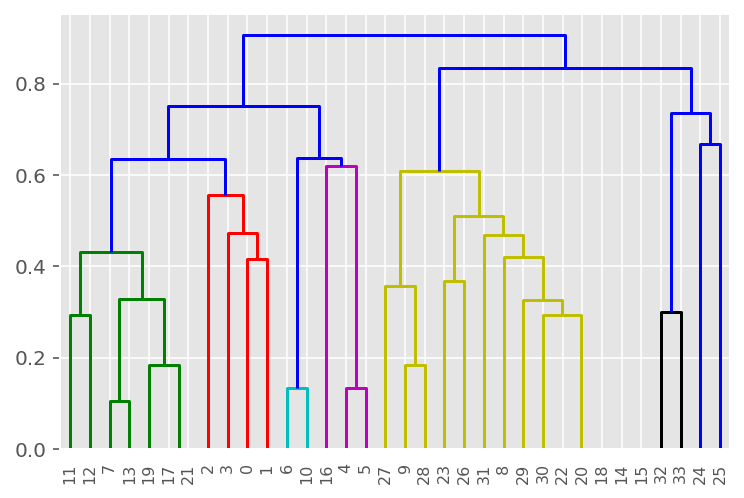

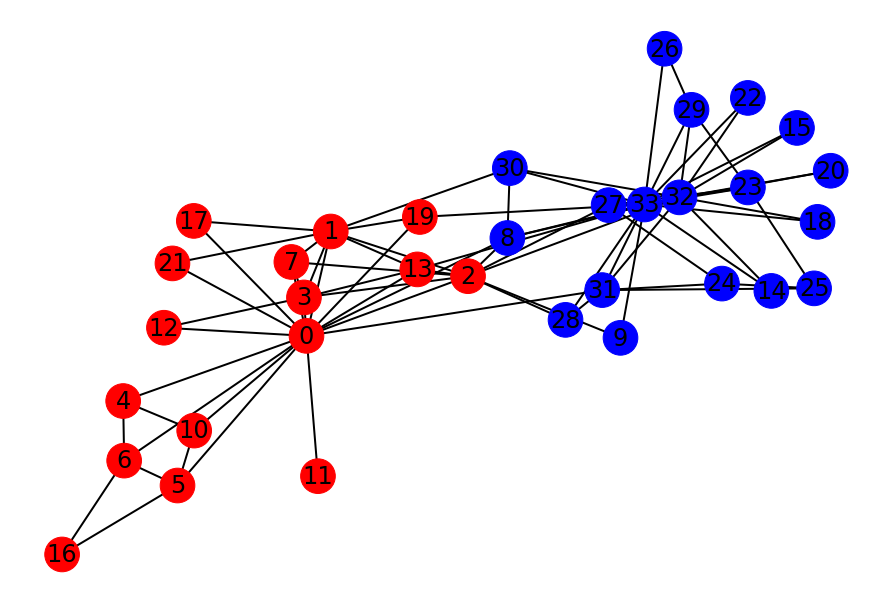

In [5]:
G = nx.karate_club_graph()
print(nx.info(G))
print("Nodes:", G.nodes())
print("Edges:", G.edges())
print("Adjacency matrix:\n", nx.adjacency_matrix(G).todense())
d_max = max(dict(G.degree()).values())
plt.hist(list(dict(G.degree()).values()),
         bins=np.linspace(0, d_max, d_max+1),
         align='left', rwidth=0.5)
plt.yticks(list(range(12)))
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')
plt.show()

print("Clustering coefficients: ")
print(nx.clustering(G))
print("Average clustering coefficient: ")
print(nx.average_clustering(G))

d_max = max(nx.clustering(G).values())
plt.hist(list(nx.clustering(G).values()),
         bins=np.linspace(0, 1, 11), align='left', rwidth=0.5)
plt.xlabel('Clustering coefficient')
plt.ylabel('Counts')
plt.title('Clustering coefficient distribution')
plt.show()

print("Shortest paths for node 0:")
print(dict(nx.shortest_path_length(G))[0])

print("Average shortest path length:", nx.average_shortest_path_length(G))

plt.hist(list(nx.betweenness_centrality(G).values()), normed=True, bins=10)
plt.title('Node betweenness distribution')
plt.show()

plt.hist(list(nx.edge_betweenness_centrality(G).values()), normed=True, bins=10)
plt.title('Edge betweenness distribution')
plt.show()

nx.draw(G, with_labels=True)
plt.title("Karate Club")
plt.show()

print("Girvan Newman Algorithm")
Girvan_Newman(G)

print("Hierarchical Clustering")
hierarchical_clustering(G)

## Florentine family graph

Name: 
Type: Graph
Number of nodes: 15
Number of edges: 20
Average degree:   2.6667
Nodes: ['Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi']
Edges: [('Acciaiuoli', 'Medici'), ('Medici', 'Barbadori'), ('Medici', 'Ridolfi'), ('Medici', 'Tornabuoni'), ('Medici', 'Albizzi'), ('Medici', 'Salviati'), ('Castellani', 'Peruzzi'), ('Castellani', 'Strozzi'), ('Castellani', 'Barbadori'), ('Peruzzi', 'Strozzi'), ('Peruzzi', 'Bischeri'), ('Strozzi', 'Ridolfi'), ('Strozzi', 'Bischeri'), ('Ridolfi', 'Tornabuoni'), ('Tornabuoni', 'Guadagni'), ('Albizzi', 'Ginori'), ('Albizzi', 'Guadagni'), ('Salviati', 'Pazzi'), ('Bischeri', 'Guadagni'), ('Guadagni', 'Lamberteschi')]
Adjacency matrix:
 [[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 1 0 0 1 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 

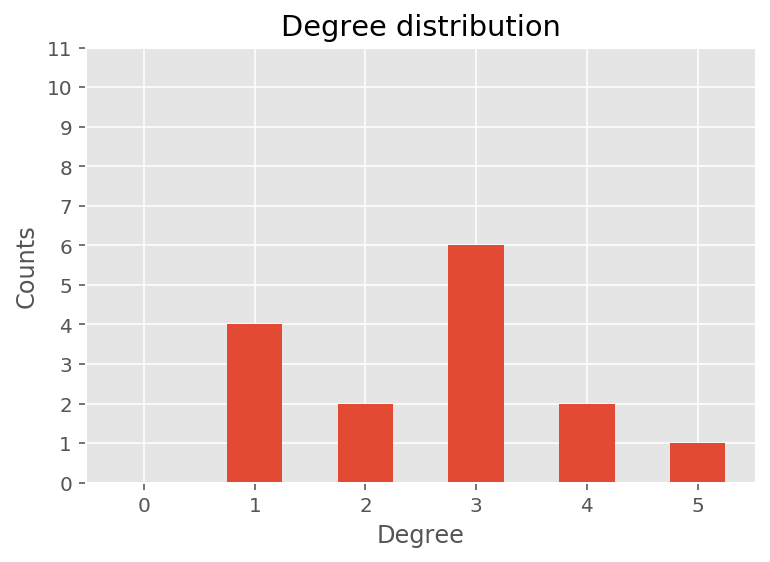

Clustering coefficients: 
{'Acciaiuoli': 0, 'Medici': 0.06666666666666667, 'Castellani': 0.3333333333333333, 'Peruzzi': 0.6666666666666666, 'Strozzi': 0.3333333333333333, 'Barbadori': 0, 'Ridolfi': 0.3333333333333333, 'Tornabuoni': 0.3333333333333333, 'Albizzi': 0, 'Salviati': 0, 'Pazzi': 0, 'Bischeri': 0.3333333333333333, 'Guadagni': 0, 'Ginori': 0, 'Lamberteschi': 0}
Average clustering coefficient: 
0.16


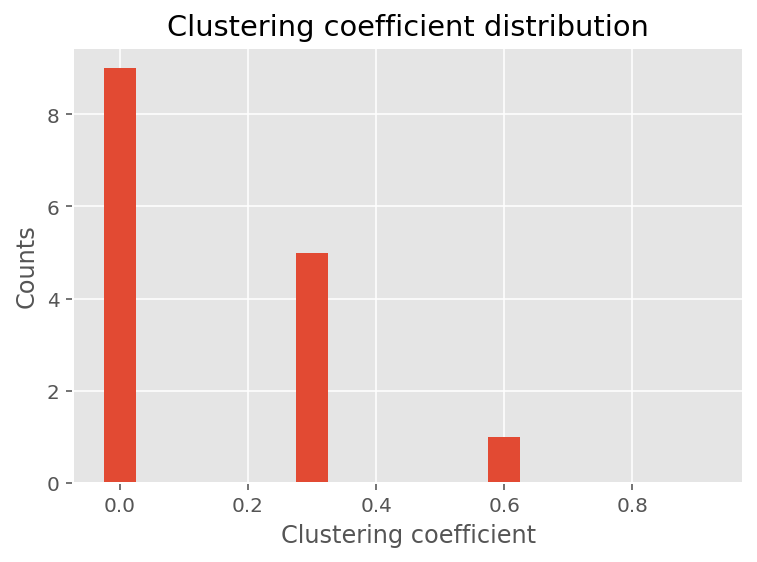

Shortest paths for node 0:
{'Medici': 0, 'Acciaiuoli': 1, 'Barbadori': 1, 'Ridolfi': 1, 'Tornabuoni': 1, 'Albizzi': 1, 'Salviati': 1, 'Castellani': 2, 'Strozzi': 2, 'Guadagni': 2, 'Ginori': 2, 'Pazzi': 2, 'Peruzzi': 3, 'Bischeri': 3, 'Lamberteschi': 3}
Average shortest path length: 2.4857142857142858


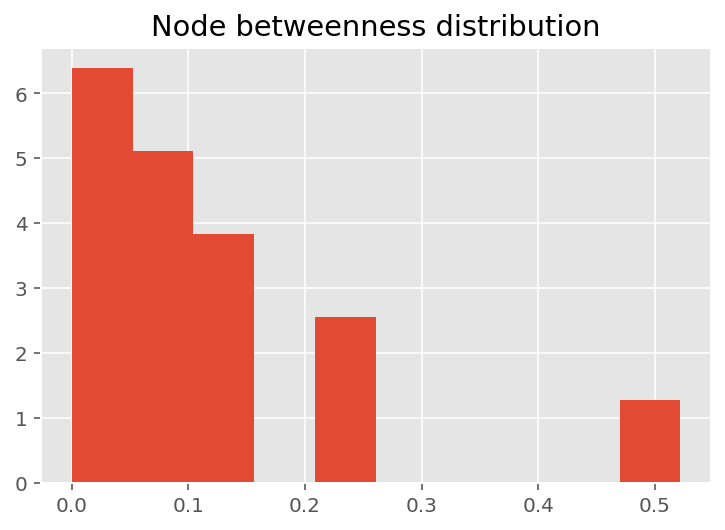

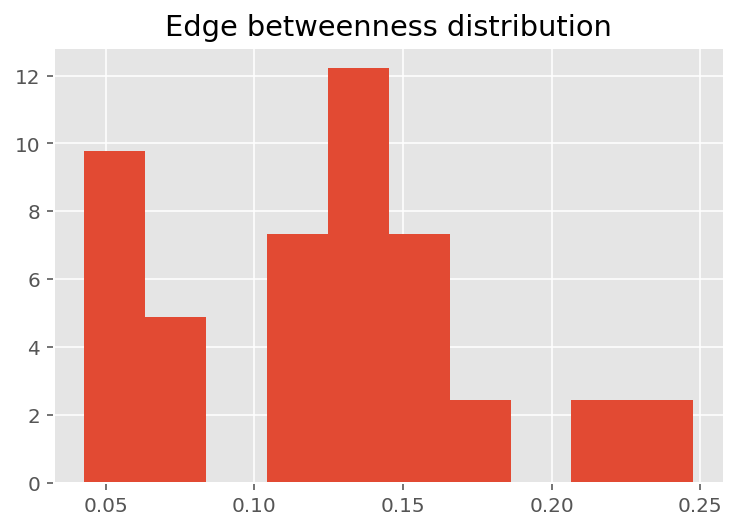

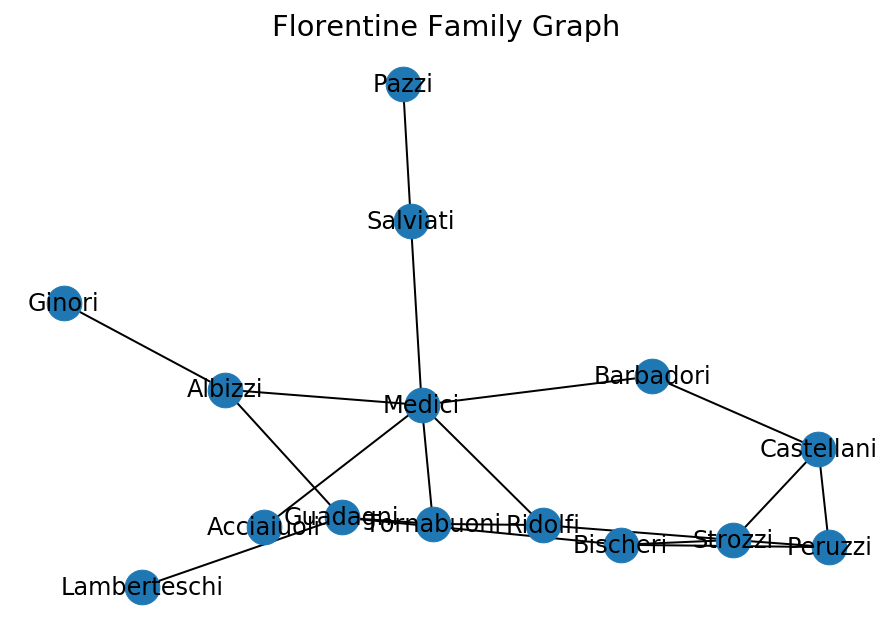

Girvan Newman Algorithm
deleting edge: ('Medici', 'Salviati') ...we have now  2  components


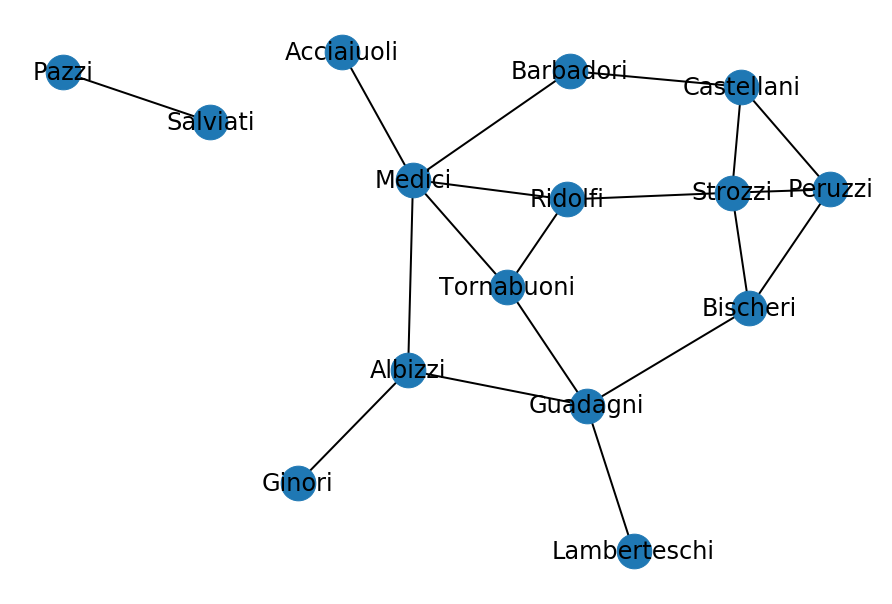

deleting edge: ('Bischeri', 'Guadagni') ...we have now  2  components
deleting edge: ('Strozzi', 'Ridolfi') ...we have now  2  components
deleting edge: ('Medici', 'Barbadori') ...we have now  3  components


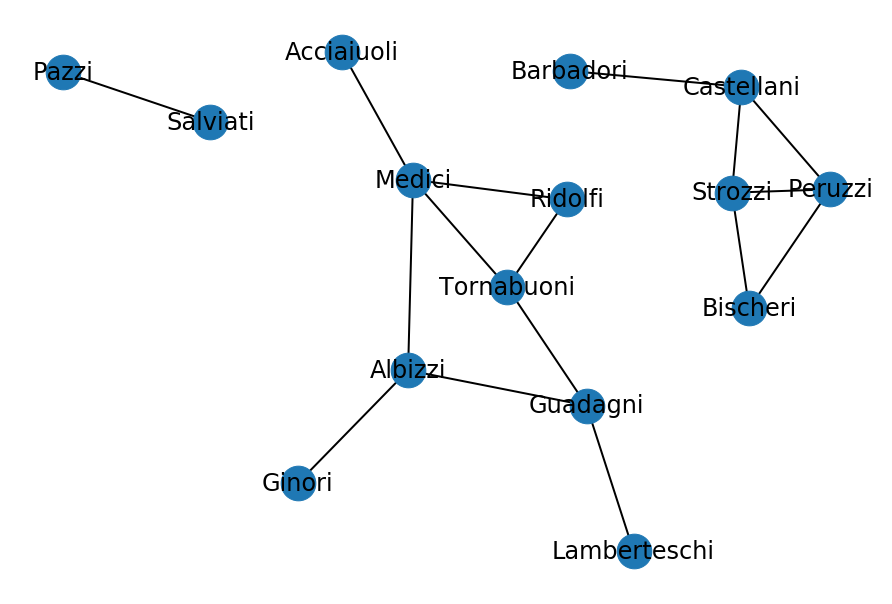

deleting edge: ('Medici', 'Albizzi') ...we have now  3  components
deleting edge: ('Tornabuoni', 'Guadagni') ...we have now  4  components


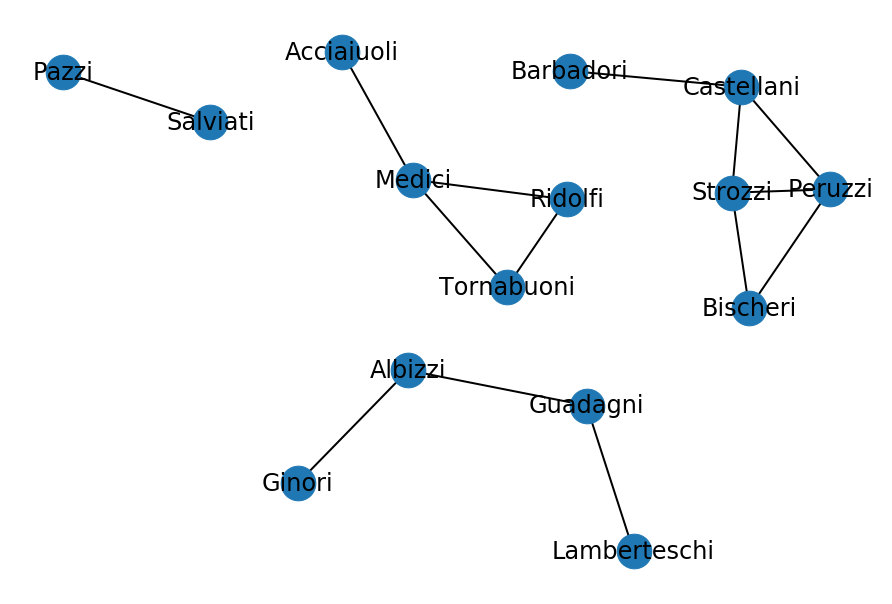

deleting edge: ('Albizzi', 'Guadagni') ...we have now  5  components


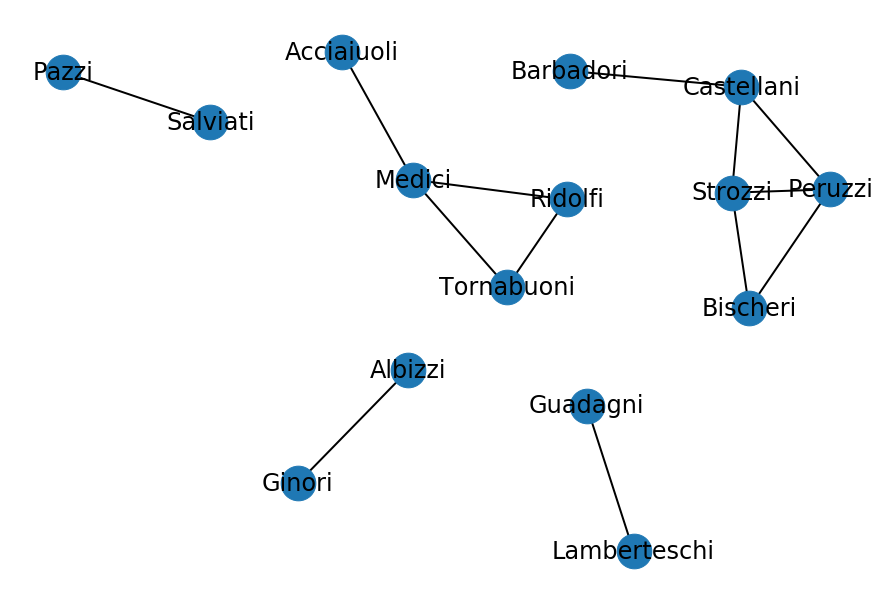

deleting edge: ('Castellani', 'Barbadori') ...we have now  6  components


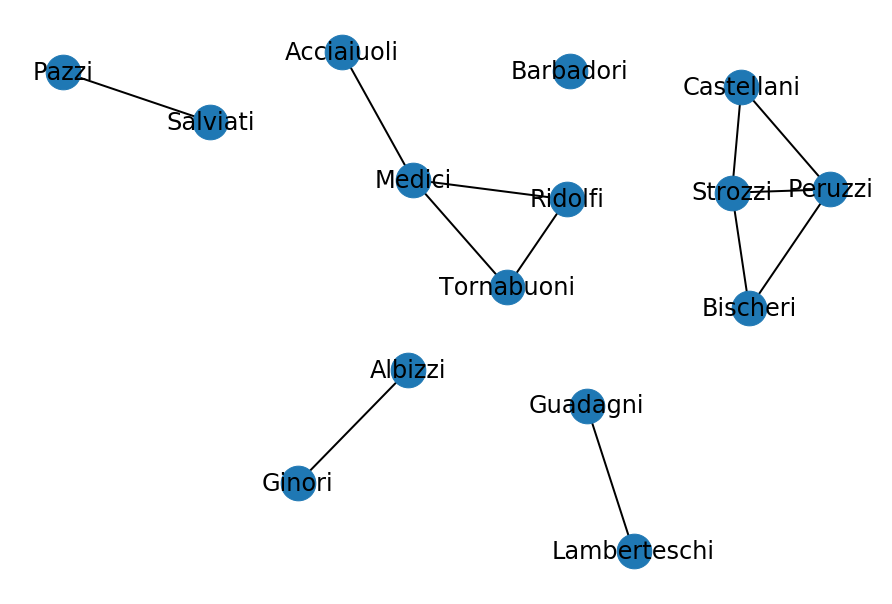

deleting edge: ('Acciaiuoli', 'Medici') ...we have now  7  components
deleting edge: ('Strozzi', 'Bischeri') ...we have now  7  components
deleting edge: ('Peruzzi', 'Bischeri') ...we have now  8  components
deleting edge: ('Guadagni', 'Lamberteschi') ...we have now  9  components
deleting edge: ('Salviati', 'Pazzi') ...we have now  10  components
deleting edge: ('Albizzi', 'Ginori') ...we have now  11  components
deleting edge: ('Ridolfi', 'Tornabuoni') ...we have now  11  components
deleting edge: ('Medici', 'Tornabuoni') ...we have now  12  components
deleting edge: ('Peruzzi', 'Strozzi') ...we have now  12  components
deleting edge: ('Castellani', 'Strozzi') ...we have now  13  components
deleting edge: ('Castellani', 'Peruzzi') ...we have now  14  components
deleting edge: ('Medici', 'Ridolfi') ...we have now  15  components
Hierarchical Clustering


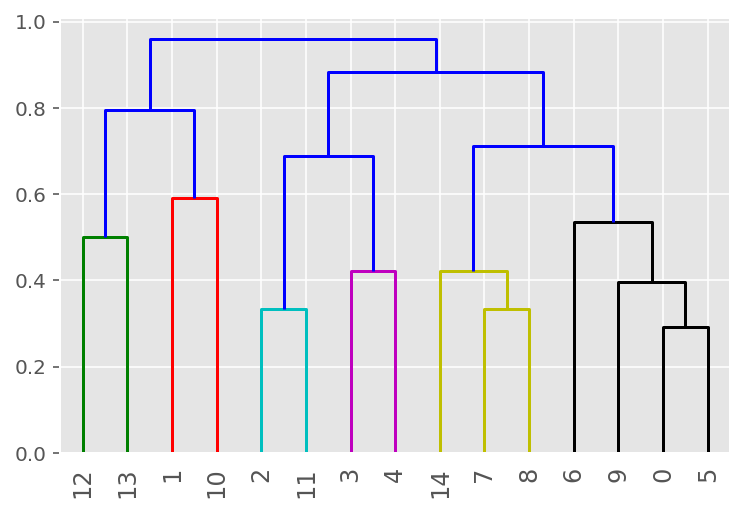

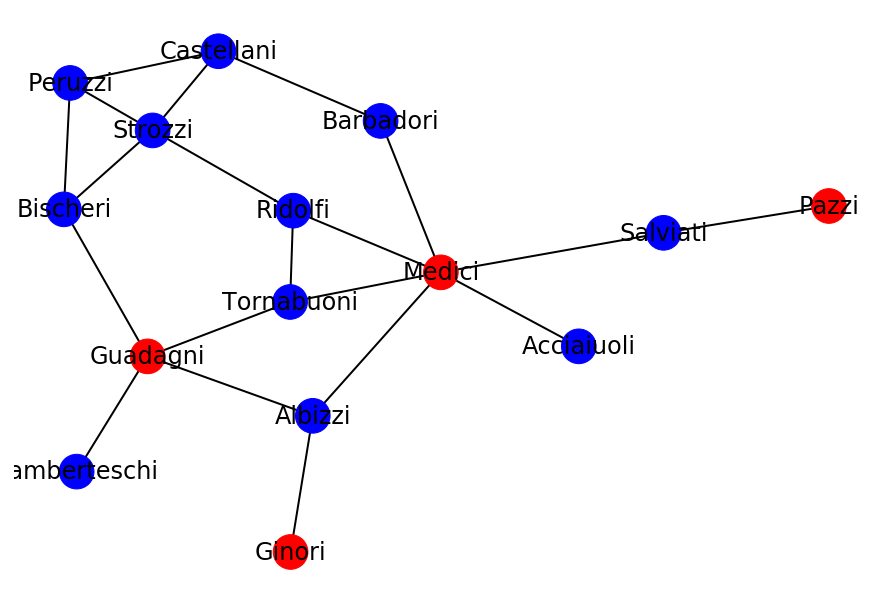

In [6]:
G = nx.florentine_families_graph()
print(nx.info(G))
print("Nodes:", G.nodes())
print("Edges:", G.edges())
print("Adjacency matrix:\n", nx.adjacency_matrix(G).todense())
d_max = max(dict(G.degree()).values())
plt.hist(list(dict(G.degree()).values()),
         bins=np.linspace(0, d_max, d_max+1),
         align='left', rwidth=0.5)
plt.yticks(list(range(12)))
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')
plt.show()

print("Clustering coefficients: ")
print(nx.clustering(G))
print("Average clustering coefficient: ")
print(nx.average_clustering(G))

d_max = max(nx.clustering(G).values())
plt.hist(list(nx.clustering(G).values()),
         bins=np.linspace(0, 1, 11), align='left', rwidth=0.5)
# plt.yticks(range(12))
plt.xlabel('Clustering coefficient')
plt.ylabel('Counts')
plt.title('Clustering coefficient distribution')
plt.show()

print("Shortest paths for node 0:")
print(dict(nx.shortest_path_length(G))['Medici'])

print("Average shortest path length:", nx.average_shortest_path_length(G))
plt.hist(list(nx.betweenness_centrality(G).values()), normed=True, bins=10)
plt.title('Node betweenness distribution')
plt.show()

plt.hist(list(nx.edge_betweenness_centrality(G).values()), normed=True, bins=10)
plt.title('Edge betweenness distribution')
plt.show()

nx.draw(G, with_labels=True)
plt.title("Florentine Family Graph")
plt.show()

print("Girvan Newman Algorithm")
Girvan_Newman(G)

print("Hierarchical Clustering")
hierarchical_clustering(G)

## Davis Southern women graph

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625
Nodes:
 ['Brenda Rogers', 'Charlotte McDowd', 'Dorothy Murchison', 'E1', 'E10', 'E11', 'E12', 'E13', 'E14', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'Eleanor Nye', 'Evelyn Jefferson', 'Flora Price', 'Frances Anderson', 'Helen Lloyd', 'Katherina Rogers', 'Laura Mandeville', 'Myra Liddel', 'Nora Fayette', 'Olivia Carleton', 'Pearl Oglethorpe', 'Ruth DeSand', 'Sylvia Avondale', 'Theresa Anderson', 'Verne Sanderson']
Edges:
 [('Evelyn Jefferson', 'E1'), ('Evelyn Jefferson', 'E2'), ('Evelyn Jefferson', 'E3'), ('Evelyn Jefferson', 'E4'), ('Evelyn Jefferson', 'E5'), ('Evelyn Jefferson', 'E6'), ('Evelyn Jefferson', 'E8'), ('Evelyn Jefferson', 'E9'), ('Laura Mandeville', 'E1'), ('Laura Mandeville', 'E2'), ('Laura Mandeville', 'E3'), ('Laura Mandeville', 'E5'), ('Laura Mandeville', 'E6'), ('Laura Mandeville', 'E7'), ('Laura Mandeville', 'E8'), ('Theresa Anderson', 'E2'), ('Theresa Anderson', 'E3'), ('There

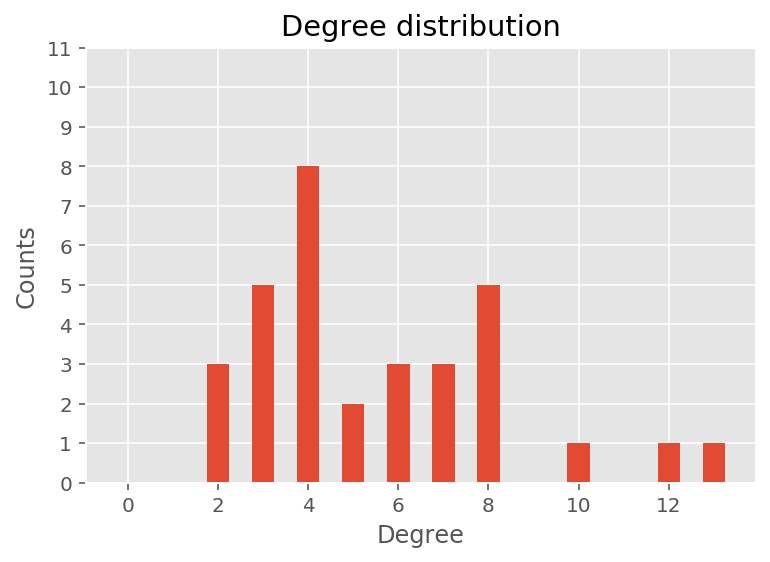

In [7]:
G = nx.davis_southern_women_graph()
print(nx.info(G))
print("Nodes:\n", sorted(G.nodes()))
print("Edges:\n", G.edges())
print("Adjacency matrix:\n", nx.adjacency_matrix(G).todense())
d_max = max(dict(G.degree()).values())
plt.hist(list(dict(G.degree()).values()),
         bins=np.linspace(0, d_max, d_max+1),
         align='left', rwidth=0.5)
plt.yticks(list(range(12)))
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')
plt.show()

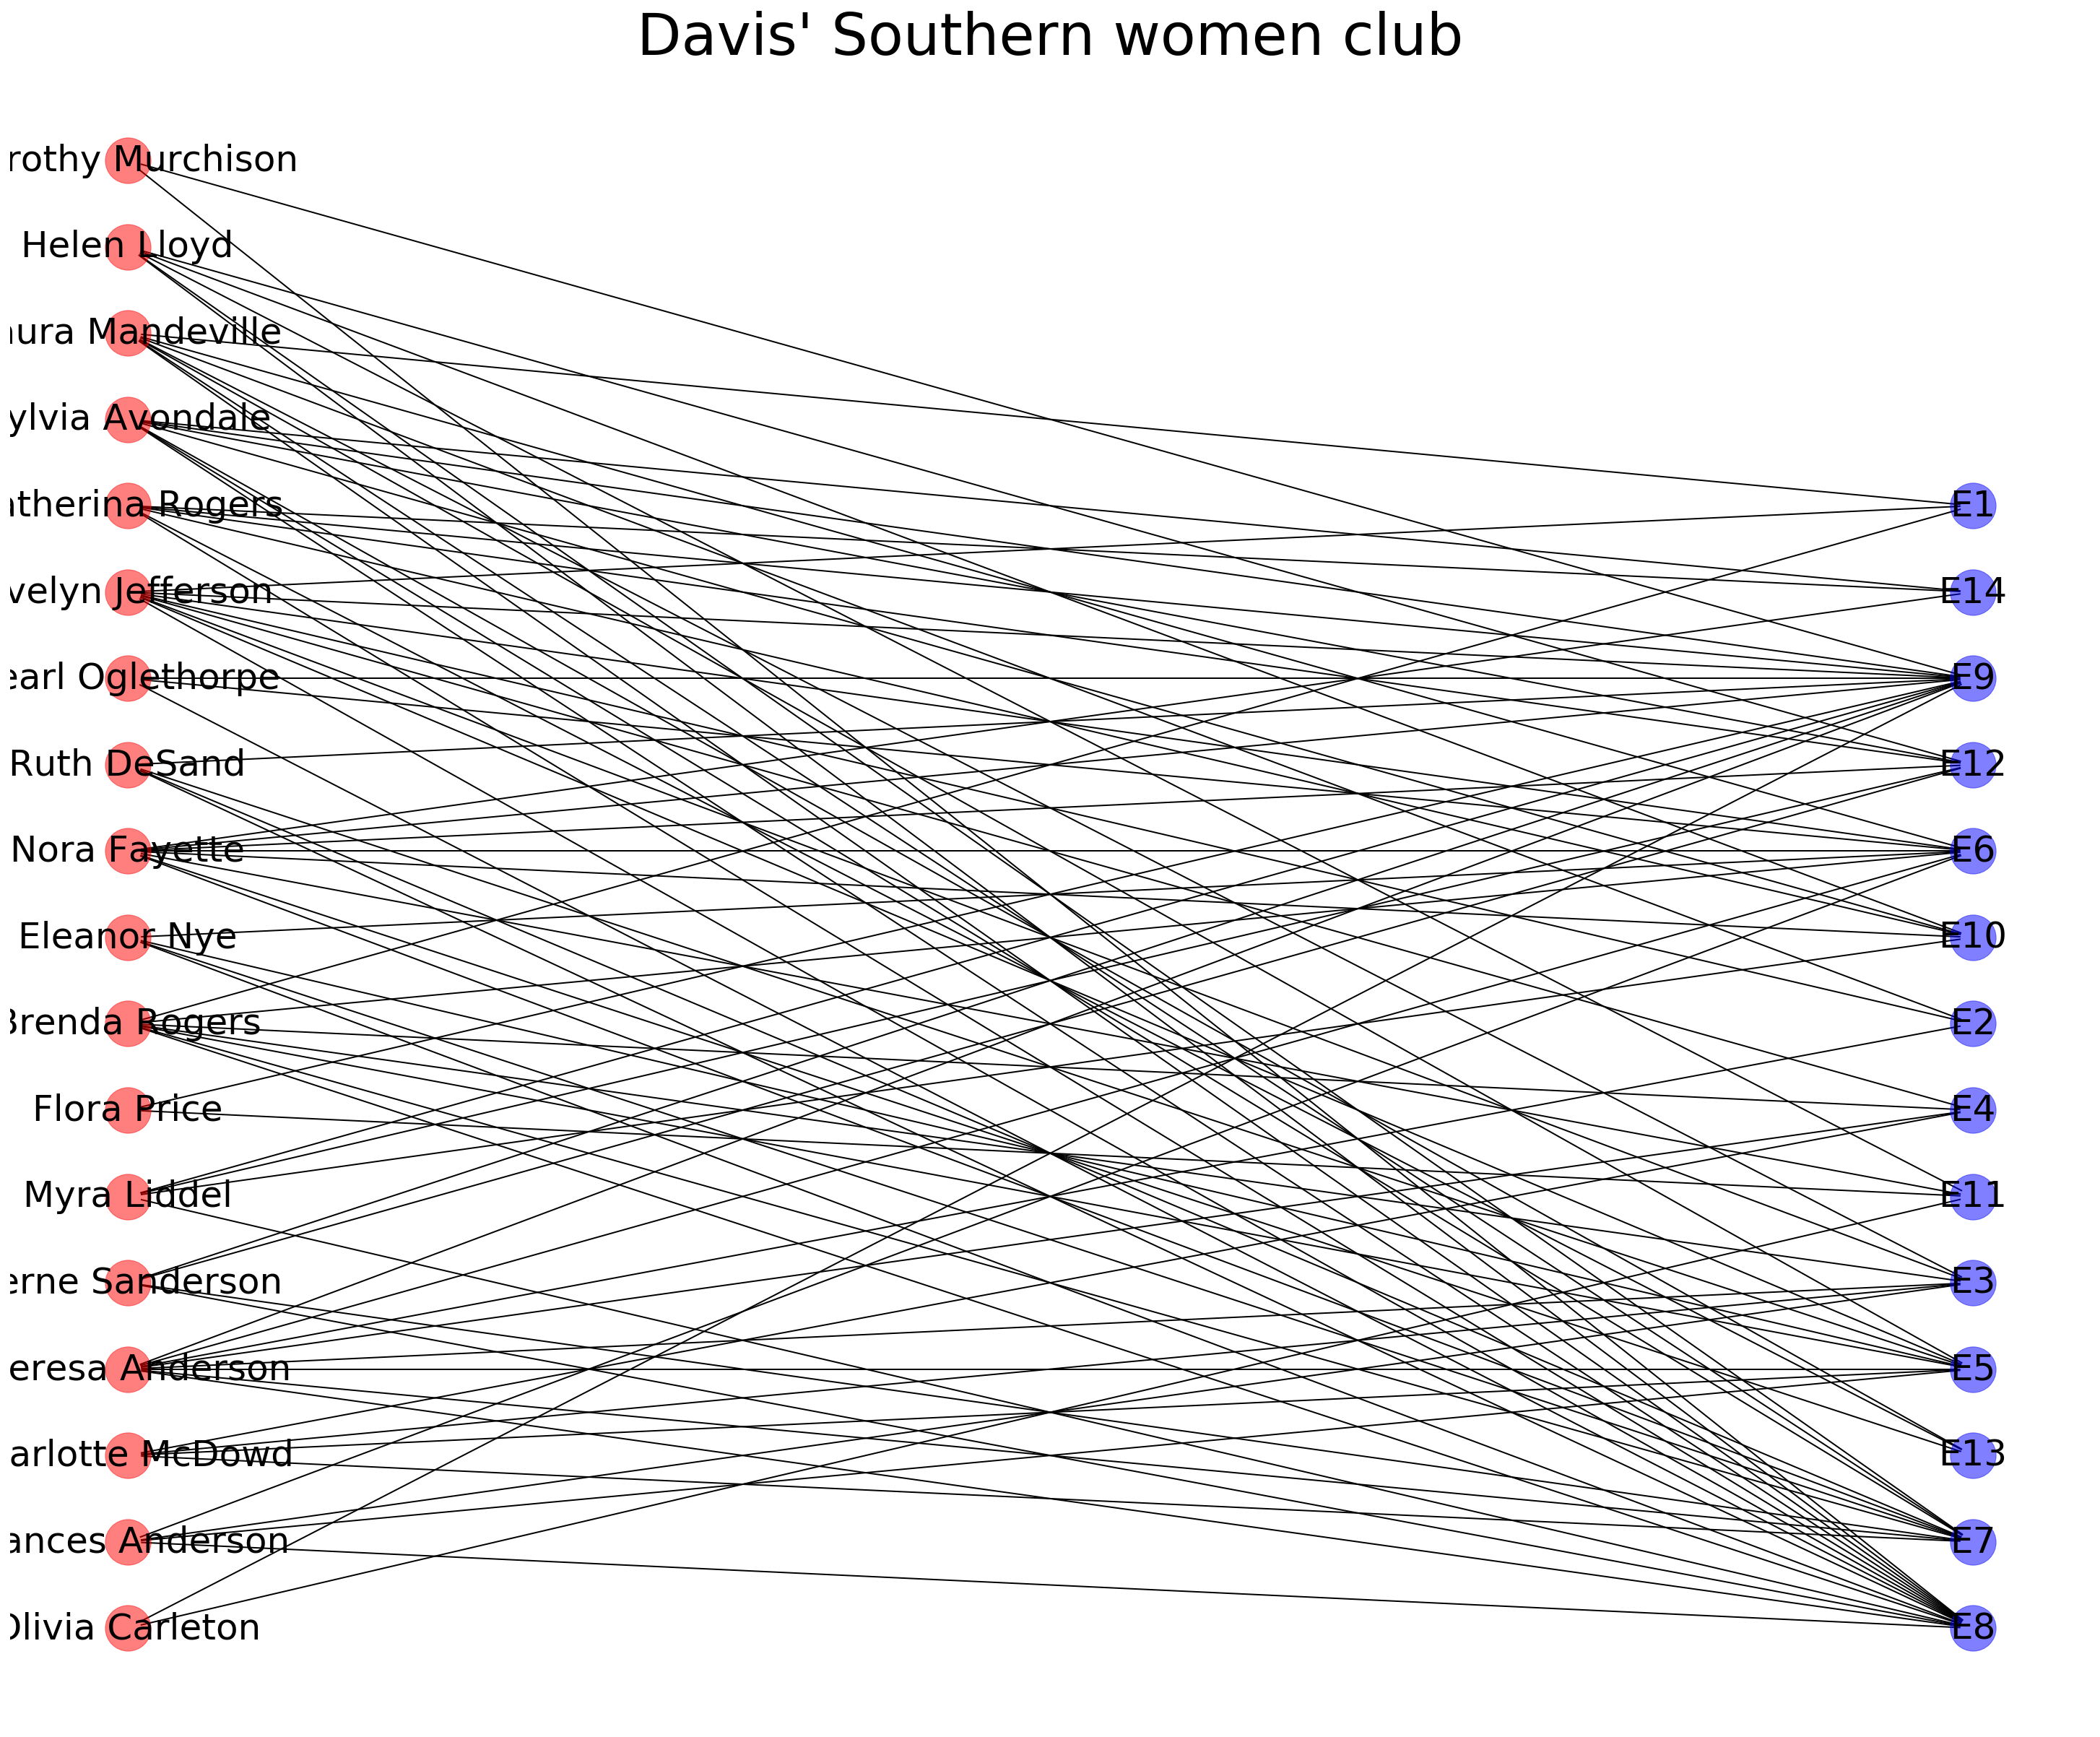

In [8]:
bottom_nodes, top_nodes = bipartite.sets(G)
position = list(zip([0]*len(bottom_nodes), list(range(len(bottom_nodes))))) + \
    list(zip([1]*len(top_nodes), list(range(len(top_nodes)))))

positions = {}
for i, node in enumerate(bottom_nodes):
    positions[node] = np.array(position[i])
for i, node in enumerate(top_nodes):
    positions[node] = np.array(position[i+len(bottom_nodes)])

plt.figure(figsize=(20, 16))
pos = nx.spring_layout(G)
nx.draw(G, pos=positions, with_labels=True, node_color='white', font_size=25)
nx.draw_networkx_nodes(bipartite.projected_graph(G, bottom_nodes),
                       pos=positions, node_color='red', node_size=1000, alpha=0.5)
nx.draw_networkx_nodes(bipartite.projected_graph(G, top_nodes),
                       pos=positions, node_color='blue', node_size=1000, alpha=0.5)
#labels = nx.draw_networkx_labels(B_2,pos=pos,font_size=6)
plt.title("Davis' Southern women club", fontsize=40)
plt.show()

In [9]:
G_top = bipartite.projected_graph(G, top_nodes)
G_bottom = bipartite.projected_graph(G, bottom_nodes)

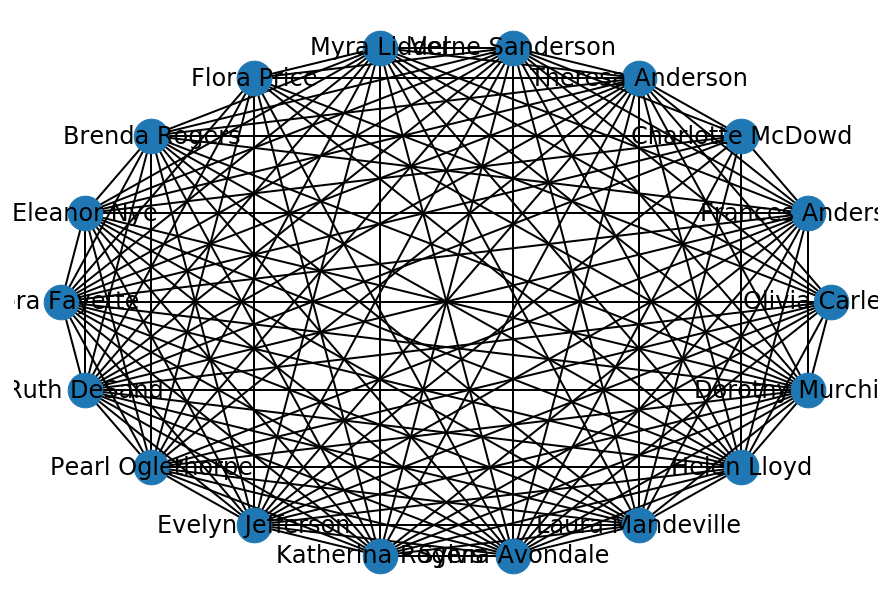

In [10]:
nx.draw_circular(G_bottom, with_labels=True)

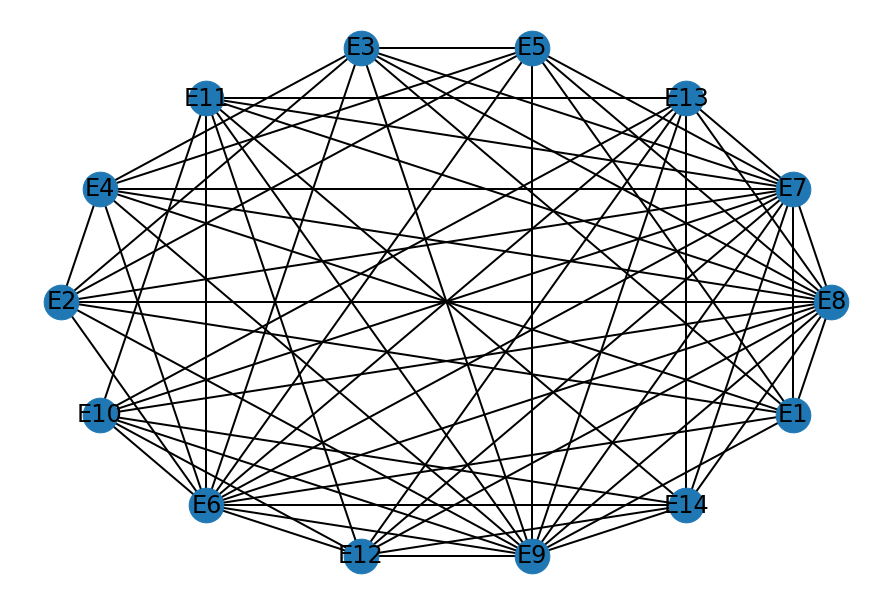

In [11]:
nx.draw_circular(G_top, with_labels=True)

Clustering coefficients: 
{'Olivia Carleton': 1.0, 'Frances Anderson': 0.9619047619047619, 'Charlotte McDowd': 1.0, 'Theresa Anderson': 0.8970588235294118, 'Verne Sanderson': 0.8970588235294118, 'Myra Liddel': 0.9333333333333333, 'Flora Price': 1.0, 'Brenda Rogers': 0.9619047619047619, 'Eleanor Nye': 0.9619047619047619, 'Nora Fayette': 0.8970588235294118, 'Ruth DeSand': 0.8970588235294118, 'Pearl Oglethorpe': 0.9333333333333333, 'Evelyn Jefferson': 0.8970588235294118, 'Katherina Rogers': 0.9333333333333333, 'Sylvia Avondale': 0.8970588235294118, 'Laura Mandeville': 0.9619047619047619, 'Helen Lloyd': 0.8970588235294118, 'Dorothy Murchison': 0.9333333333333333}
Average clustering coefficient: 
0.9366868969810144


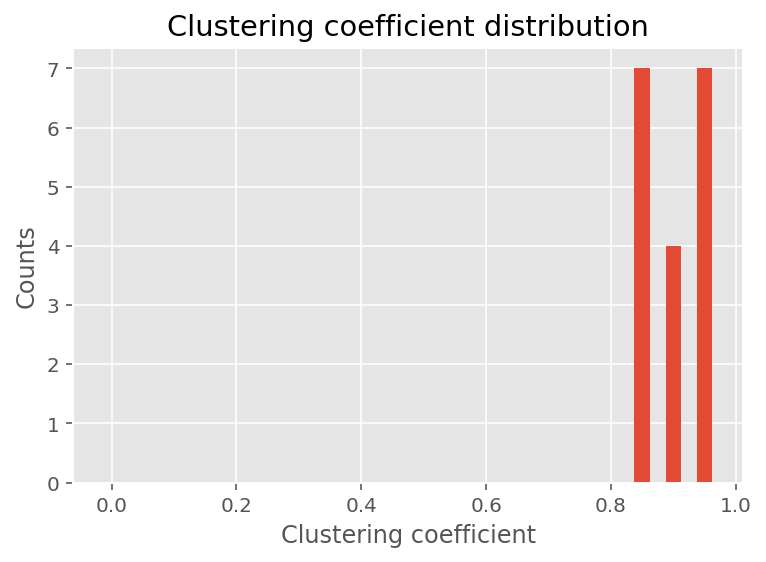

Shortest paths for node 0:
{'Theresa Anderson': 0, 'Olivia Carleton': 1, 'Frances Anderson': 1, 'Charlotte McDowd': 1, 'Sylvia Avondale': 1, 'Verne Sanderson': 1, 'Myra Liddel': 1, 'Dorothy Murchison': 1, 'Brenda Rogers': 1, 'Flora Price': 1, 'Ruth DeSand': 1, 'Pearl Oglethorpe': 1, 'Evelyn Jefferson': 1, 'Katherina Rogers': 1, 'Nora Fayette': 1, 'Laura Mandeville': 1, 'Helen Lloyd': 1, 'Eleanor Nye': 1}
Average shortest path length: 1.091503267973856


In [12]:
print("Clustering coefficients: ")
print(nx.clustering(bipartite.projected_graph(G, bottom_nodes)))
print("Average clustering coefficient: ")
print(nx.average_clustering(bipartite.projected_graph(G, bottom_nodes)))

d_max = max(nx.clustering(bipartite.projected_graph(G, bottom_nodes)).values())
plt.hist(list(nx.clustering(bipartite.projected_graph(G, bottom_nodes)).values()),
         bins=np.linspace(0, 1, 21), align='left', rwidth=0.5)
# plt.yticks(range(12))
plt.xlabel('Clustering coefficient')
plt.ylabel('Counts')
plt.title('Clustering coefficient distribution')
plt.show()

print("Shortest paths for node 0:")
print(dict(nx.shortest_path_length(
    bipartite.projected_graph(G, bottom_nodes)))['Theresa Anderson'])

print("Average shortest path length:", end=' ')
print(nx.average_shortest_path_length(
    bipartite.projected_graph(G, bottom_nodes)))

Clustering coefficients: 
{'E8': 0.6794871794871795, 'E7': 0.6794871794871795, 'E13': 1.0, 'E5': 1.0, 'E3': 1.0, 'E11': 1.0, 'E4': 1.0, 'E2': 1.0, 'E10': 1.0, 'E6': 0.6794871794871795, 'E12': 1.0, 'E9': 0.6794871794871795, 'E14': 1.0, 'E1': 1.0}
Average clustering coefficient: 
0.9084249084249084


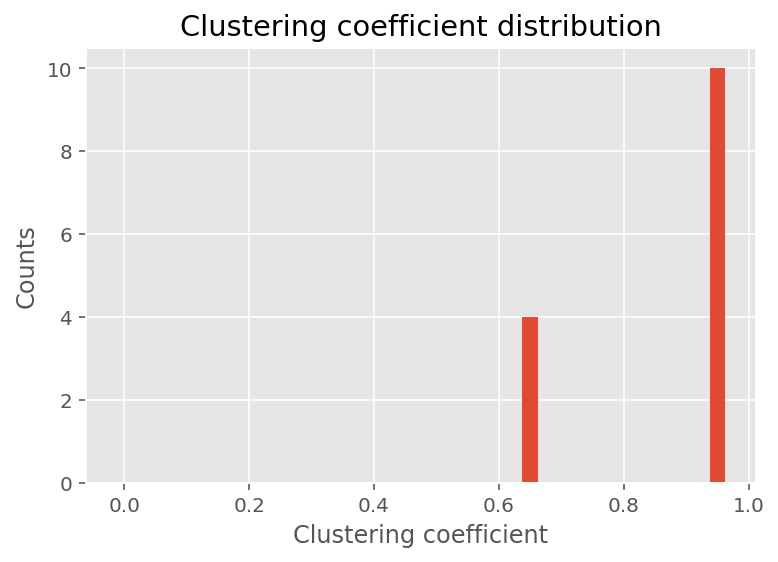

Shortest paths for node 0:
{'E11': 0, 'E8': 1, 'E7': 1, 'E13': 1, 'E10': 1, 'E12': 1, 'E6': 1, 'E9': 1, 'E14': 1, 'E5': 2, 'E3': 2, 'E4': 2, 'E2': 2, 'E1': 2}
Average shortest path length: 1.2747252747252746


In [13]:
print("Clustering coefficients: ")
print(nx.clustering(bipartite.projected_graph(G, top_nodes)))
print("Average clustering coefficient: ")
print(nx.average_clustering(bipartite.projected_graph(G, top_nodes)))

d_max = max(nx.clustering(bipartite.projected_graph(G, top_nodes)).values())
plt.hist(list(nx.clustering(bipartite.projected_graph(G, top_nodes)).values()),
         bins=np.linspace(0, 1, 21), align='left', rwidth=0.5)
# plt.yticks(range(12))
plt.xlabel('Clustering coefficient')
plt.ylabel('Counts')
plt.title('Clustering coefficient distribution')
plt.show()

print("Shortest paths for node 0:")
print(dict(nx.shortest_path_length(
    bipartite.projected_graph(G, top_nodes)))['E11'])

print("Average shortest path length:", end=' ')
print(nx.average_shortest_path_length(bipartite.projected_graph(G, top_nodes)))

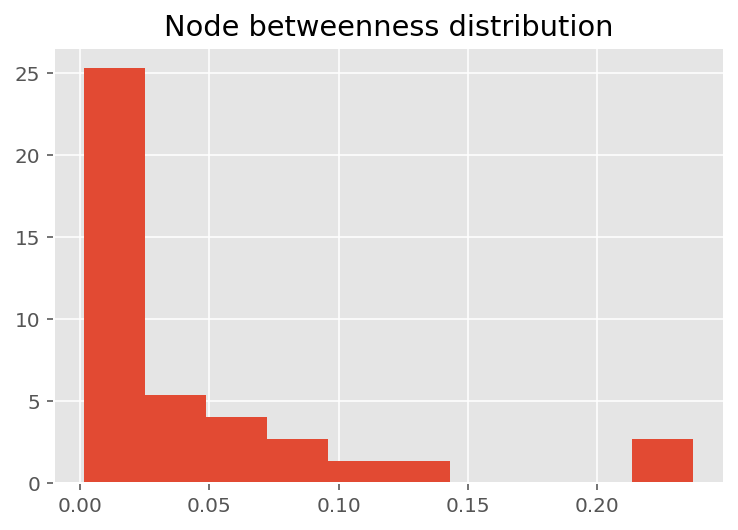

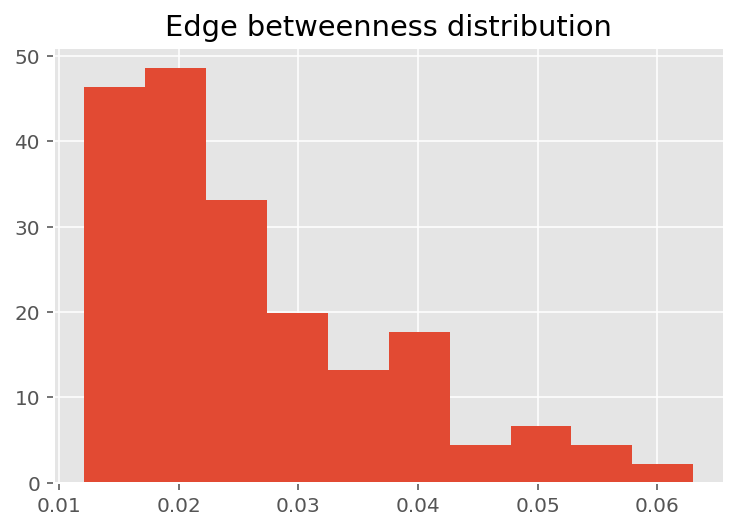

In [14]:
plt.hist(list(nx.betweenness_centrality(G).values()), normed=True, bins=10)
plt.title('Node betweenness distribution')
plt.show()

plt.hist(list(nx.edge_betweenness_centrality(G).values()), normed=True, bins=10)
plt.title('Edge betweenness distribution')
plt.show()

Girvan Newman Algorithm
deleting edge: ('Evelyn Jefferson', 'E9') ...we have now  1  components
deleting edge: ('Theresa Anderson', 'E9') ...we have now  1  components
deleting edge: ('Nora Fayette', 'E6') ...we have now  1  components
deleting edge: ('Nora Fayette', 'E7') ...we have now  1  components
deleting edge: ('Katherina Rogers', 'E8') ...we have now  1  components
deleting edge: ('Sylvia Avondale', 'E8') ...we have now  1  components
deleting edge: ('Sylvia Avondale', 'E7') ...we have now  1  components
deleting edge: ('Ruth DeSand', 'E9') ...we have now  1  components
deleting edge: ('Myra Liddel', 'E8') ...we have now  1  components
deleting edge: ('Helen Lloyd', 'E8') ...we have now  1  components
deleting edge: ('Helen Lloyd', 'E7') ...we have now  1  components
deleting edge: ('Verne Sanderson', 'E12') ...we have now  1  components
deleting edge: ('Verne Sanderson', 'E9') ...we have now  1  components
deleting edge: ('Pearl Oglethorpe', 'E9') ...we have now  1  components

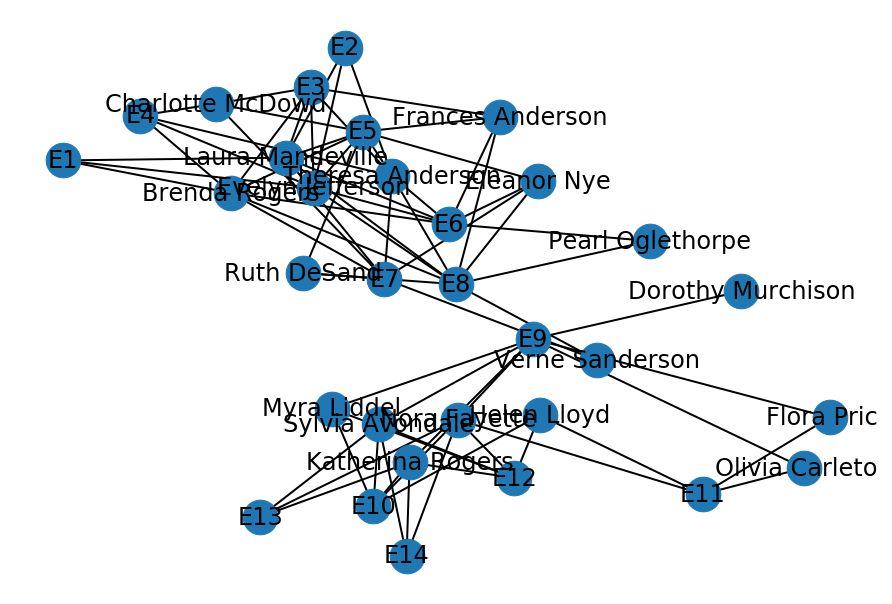

deleting edge: ('Dorothy Murchison', 'E9') ...we have now  3  components


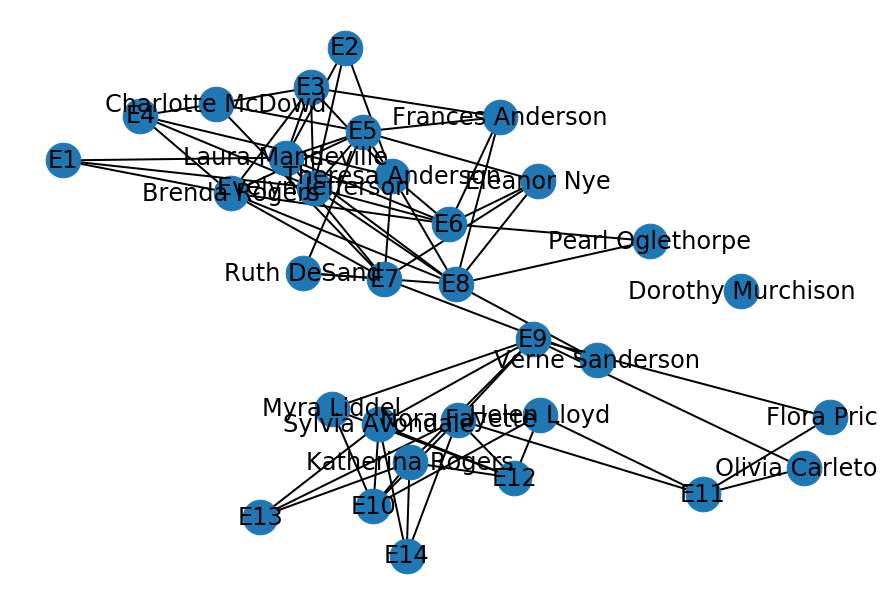

deleting edge: ('Verne Sanderson', 'E8') ...we have now  3  components
deleting edge: ('Verne Sanderson', 'E7') ...we have now  4  components


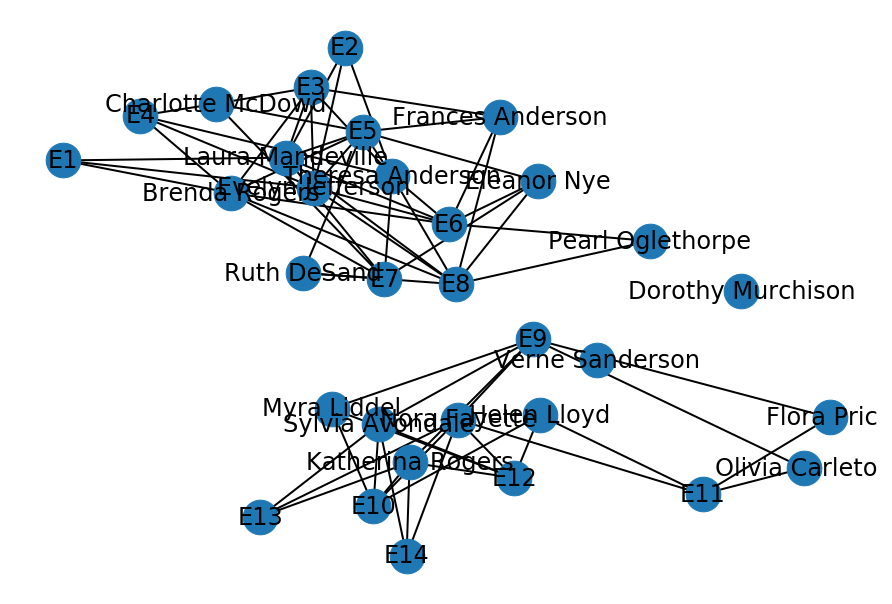

deleting edge: ('Nora Fayette', 'E11') ...we have now  4  components
deleting edge: ('Flora Price', 'E9') ...we have now  4  components
deleting edge: ('Helen Lloyd', 'E11') ...we have now  4  components
deleting edge: ('Olivia Carleton', 'E9') ...we have now  5  components


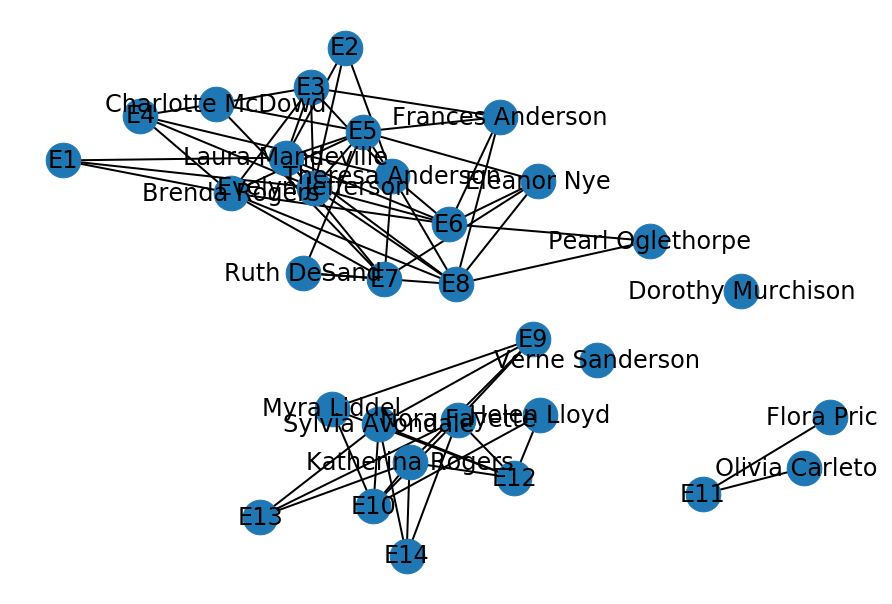

deleting edge: ('Pearl Oglethorpe', 'E8') ...we have now  5  components
deleting edge: ('Pearl Oglethorpe', 'E6') ...we have now  6  components


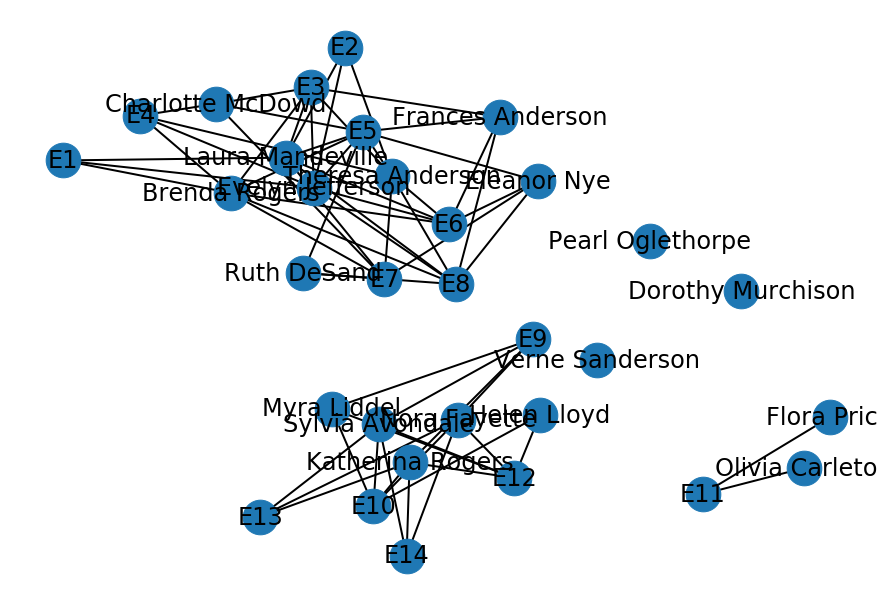

deleting edge: ('Ruth DeSand', 'E5') ...we have now  6  components
deleting edge: ('Ruth DeSand', 'E8') ...we have now  6  components
deleting edge: ('Ruth DeSand', 'E7') ...we have now  7  components
deleting edge: ('Charlotte McDowd', 'E5') ...we have now  7  components
deleting edge: ('Charlotte McDowd', 'E3') ...we have now  7  components
deleting edge: ('Charlotte McDowd', 'E7') ...we have now  7  components
deleting edge: ('Charlotte McDowd', 'E4') ...we have now  8  components
deleting edge: ('Theresa Anderson', 'E4') ...we have now  8  components
deleting edge: ('Brenda Rogers', 'E4') ...we have now  8  components
deleting edge: ('Evelyn Jefferson', 'E4') ...we have now  9  components
deleting edge: ('Laura Mandeville', 'E2') ...we have now  9  components
deleting edge: ('Theresa Anderson', 'E2') ...we have now  9  components
deleting edge: ('Evelyn Jefferson', 'E2') ...we have now  10  components
deleting edge: ('Helen Lloyd', 'E12') ...we have now  10  components
deleting edg

In [15]:
print("Girvan Newman Algorithm")
Girvan_Newman(G)

deleting edge: ('E9', 'E1') ...we have now  1  components
deleting edge: ('E6', 'E1') ...we have now  1  components
deleting edge: ('E7', 'E1') ...we have now  1  components
deleting edge: ('E8', 'E1') ...we have now  1  components
deleting edge: ('E2', 'E1') ...we have now  1  components
deleting edge: ('E3', 'E1') ...we have now  1  components
deleting edge: ('E4', 'E1') ...we have now  1  components
deleting edge: ('E5', 'E1') ...we have now  2  components


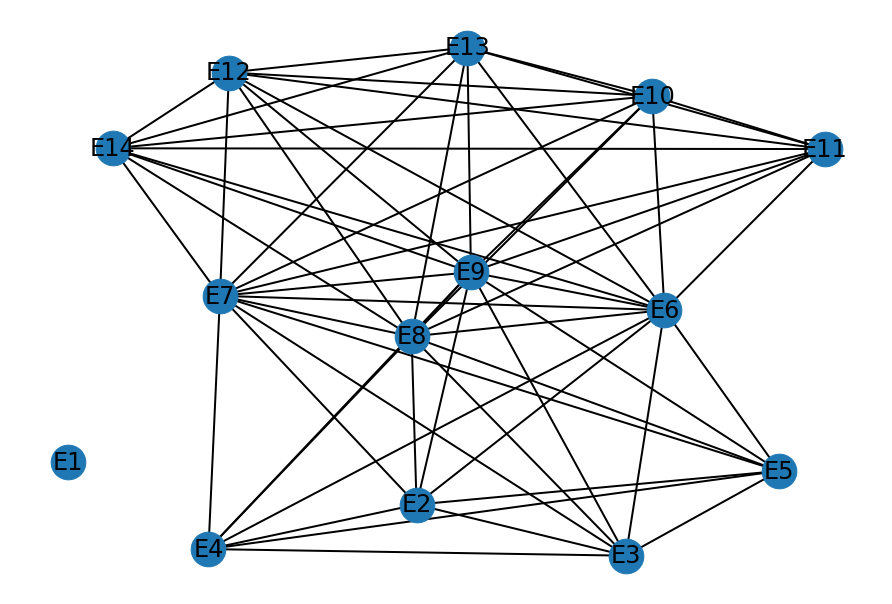

deleting edge: ('E2', 'E9') ...we have now  2  components
deleting edge: ('E2', 'E6') ...we have now  2  components
deleting edge: ('E7', 'E2') ...we have now  2  components
deleting edge: ('E8', 'E2') ...we have now  2  components
deleting edge: ('E4', 'E2') ...we have now  2  components
deleting edge: ('E3', 'E2') ...we have now  2  components
deleting edge: ('E5', 'E2') ...we have now  3  components


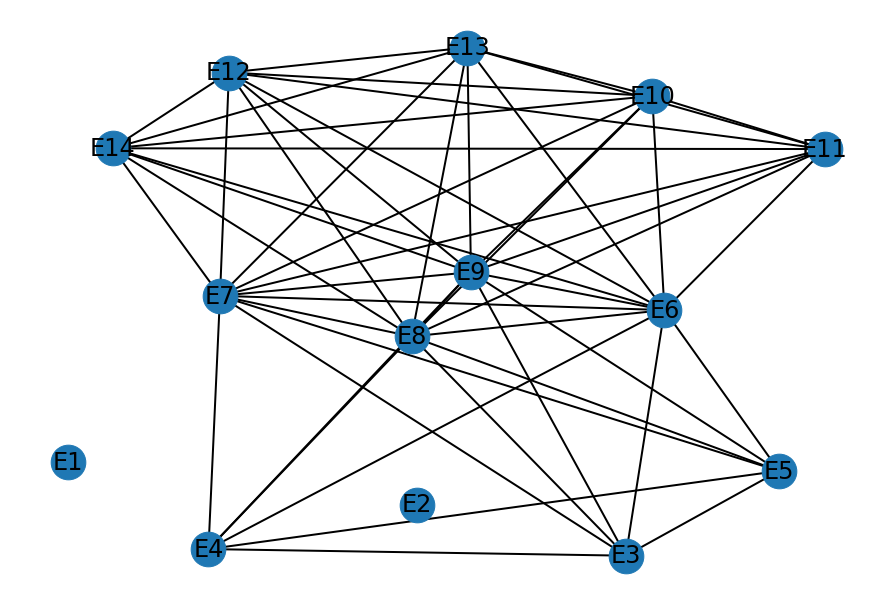

deleting edge: ('E4', 'E9') ...we have now  3  components
deleting edge: ('E4', 'E6') ...we have now  3  components
deleting edge: ('E7', 'E4') ...we have now  3  components
deleting edge: ('E8', 'E4') ...we have now  3  components
deleting edge: ('E3', 'E4') ...we have now  3  components
deleting edge: ('E5', 'E4') ...we have now  4  components


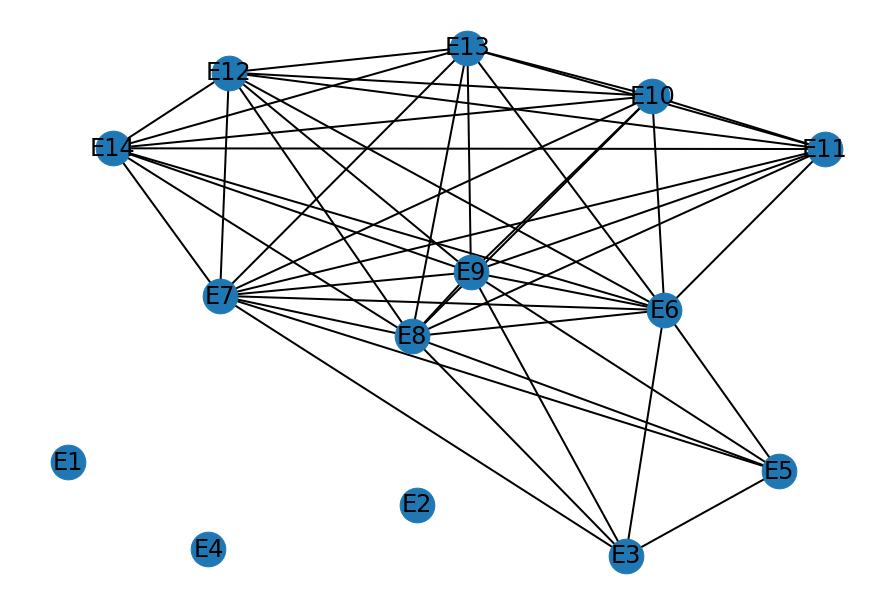

deleting edge: ('E3', 'E9') ...we have now  4  components
deleting edge: ('E3', 'E6') ...we have now  4  components
deleting edge: ('E7', 'E3') ...we have now  4  components
deleting edge: ('E8', 'E3') ...we have now  4  components
deleting edge: ('E5', 'E3') ...we have now  5  components


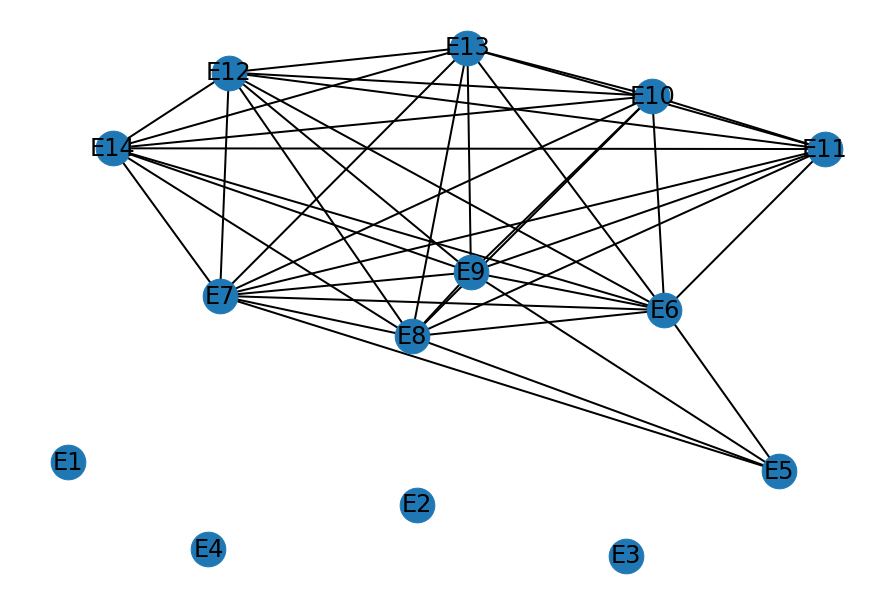

deleting edge: ('E5', 'E9') ...we have now  5  components
deleting edge: ('E5', 'E6') ...we have now  5  components
deleting edge: ('E7', 'E5') ...we have now  5  components
deleting edge: ('E8', 'E5') ...we have now  6  components


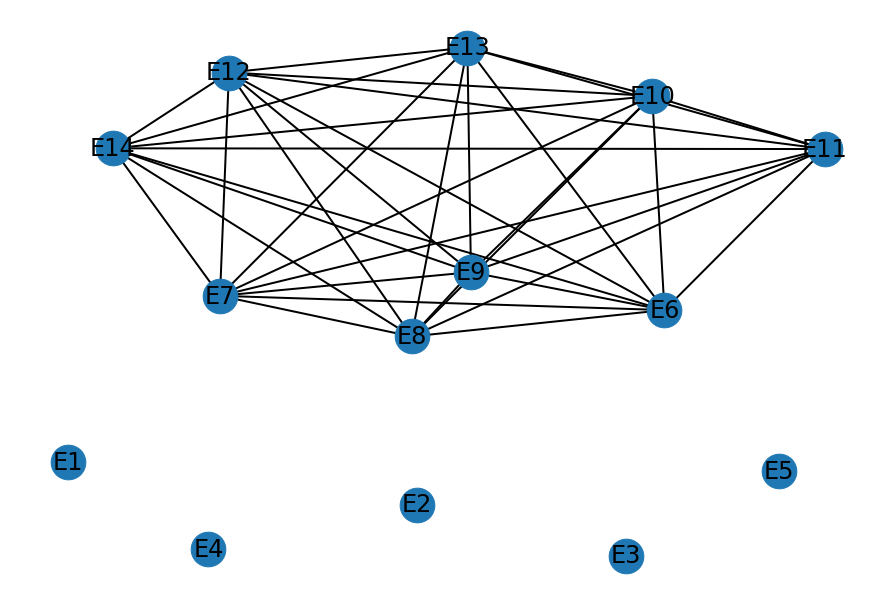

deleting edge: ('E9', 'E14') ...we have now  6  components
deleting edge: ('E12', 'E14') ...we have now  6  components
deleting edge: ('E6', 'E14') ...we have now  6  components
deleting edge: ('E10', 'E14') ...we have now  6  components
deleting edge: ('E11', 'E14') ...we have now  6  components
deleting edge: ('E13', 'E14') ...we have now  6  components
deleting edge: ('E7', 'E14') ...we have now  6  components
deleting edge: ('E8', 'E14') ...we have now  7  components
deleting edge: ('E12', 'E9') ...we have now  7  components
deleting edge: ('E6', 'E9') ...we have now  7  components
deleting edge: ('E10', 'E9') ...we have now  7  components
deleting edge: ('E11', 'E9') ...we have now  7  components
deleting edge: ('E13', 'E9') ...we have now  7  components
deleting edge: ('E7', 'E9') ...we have now  7  components
deleting edge: ('E8', 'E9') ...we have now  8  components
deleting edge: ('E6', 'E12') ...we have now  8  components
deleting edge: ('E10', 'E6') ...we have now  8  compone

In [16]:
Girvan_Newman(G_top)

deleting edge: ('Charlotte McDowd', 'Helen Lloyd') ...we have now  1  components
deleting edge: ('Charlotte McDowd', 'Sylvia Avondale') ...we have now  1  components
deleting edge: ('Charlotte McDowd', 'Evelyn Jefferson') ...we have now  1  components
deleting edge: ('Charlotte McDowd', 'Ruth DeSand') ...we have now  1  components
deleting edge: ('Charlotte McDowd', 'Nora Fayette') ...we have now  1  components
deleting edge: ('Charlotte McDowd', 'Verne Sanderson') ...we have now  1  components
deleting edge: ('Charlotte McDowd', 'Theresa Anderson') ...we have now  1  components
deleting edge: ('Charlotte McDowd', 'Eleanor Nye') ...we have now  1  components
deleting edge: ('Charlotte McDowd', 'Laura Mandeville') ...we have now  1  components
deleting edge: ('Charlotte McDowd', 'Brenda Rogers') ...we have now  1  components
deleting edge: ('Frances Anderson', 'Charlotte McDowd') ...we have now  2  components


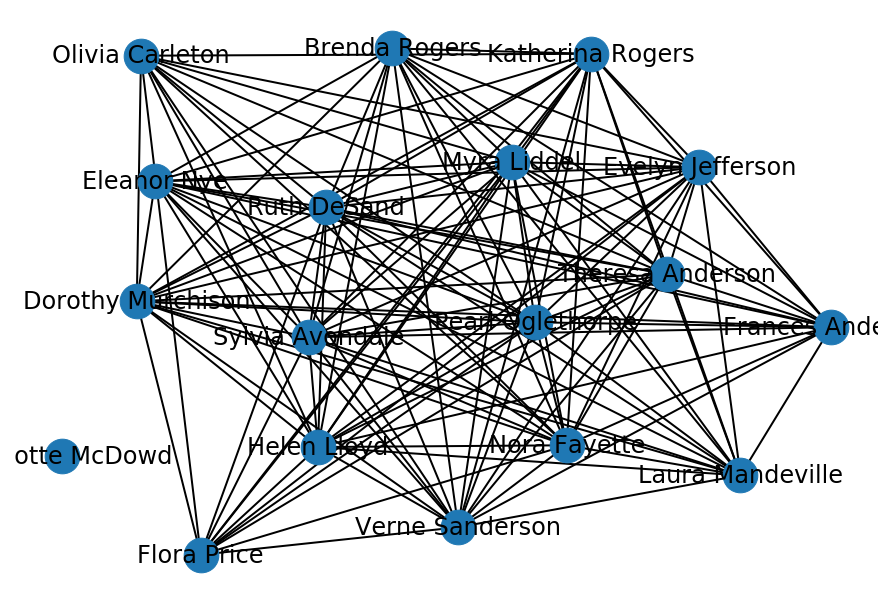

deleting edge: ('Flora Price', 'Dorothy Murchison') ...we have now  2  components
deleting edge: ('Flora Price', 'Helen Lloyd') ...we have now  2  components
deleting edge: ('Flora Price', 'Sylvia Avondale') ...we have now  2  components
deleting edge: ('Flora Price', 'Katherina Rogers') ...we have now  2  components
deleting edge: ('Flora Price', 'Evelyn Jefferson') ...we have now  2  components
deleting edge: ('Myra Liddel', 'Flora Price') ...we have now  2  components
deleting edge: ('Flora Price', 'Pearl Oglethorpe') ...we have now  2  components
deleting edge: ('Flora Price', 'Ruth DeSand') ...we have now  2  components
deleting edge: ('Flora Price', 'Nora Fayette') ...we have now  2  components
deleting edge: ('Verne Sanderson', 'Flora Price') ...we have now  2  components
deleting edge: ('Theresa Anderson', 'Flora Price') ...we have now  2  components
deleting edge: ('Olivia Carleton', 'Flora Price') ...we have now  3  components


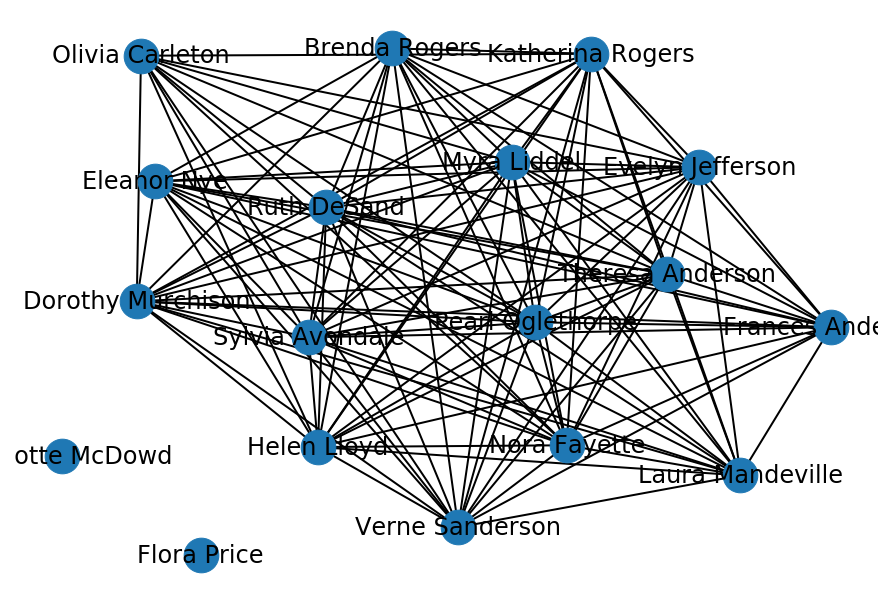

deleting edge: ('Olivia Carleton', 'Dorothy Murchison') ...we have now  3  components
deleting edge: ('Olivia Carleton', 'Helen Lloyd') ...we have now  3  components
deleting edge: ('Olivia Carleton', 'Sylvia Avondale') ...we have now  3  components
deleting edge: ('Olivia Carleton', 'Katherina Rogers') ...we have now  3  components
deleting edge: ('Olivia Carleton', 'Evelyn Jefferson') ...we have now  3  components
deleting edge: ('Olivia Carleton', 'Pearl Oglethorpe') ...we have now  3  components
deleting edge: ('Olivia Carleton', 'Ruth DeSand') ...we have now  3  components
deleting edge: ('Olivia Carleton', 'Nora Fayette') ...we have now  3  components
deleting edge: ('Olivia Carleton', 'Myra Liddel') ...we have now  3  components
deleting edge: ('Olivia Carleton', 'Verne Sanderson') ...we have now  3  components
deleting edge: ('Olivia Carleton', 'Theresa Anderson') ...we have now  4  components


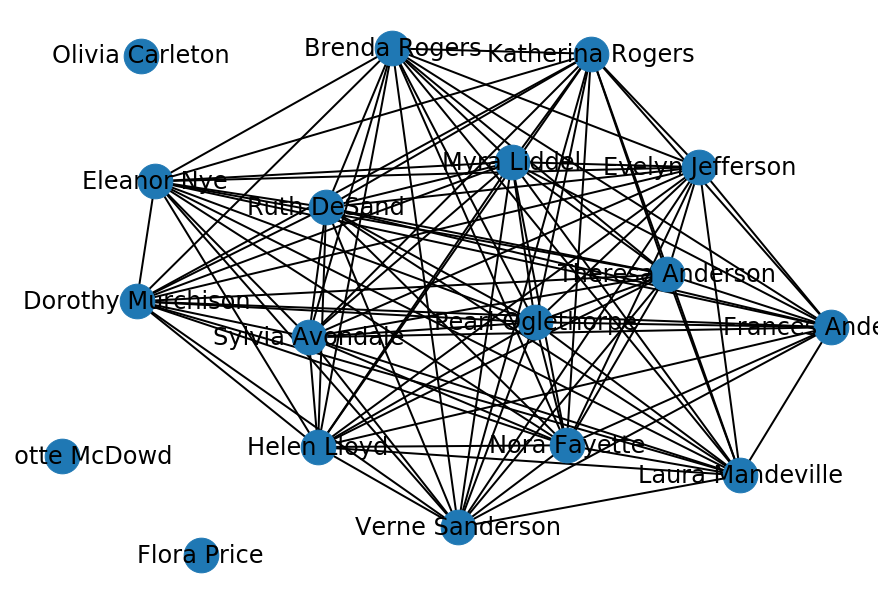

deleting edge: ('Helen Lloyd', 'Dorothy Murchison') ...we have now  4  components
deleting edge: ('Laura Mandeville', 'Helen Lloyd') ...we have now  4  components
deleting edge: ('Sylvia Avondale', 'Helen Lloyd') ...we have now  4  components
deleting edge: ('Katherina Rogers', 'Helen Lloyd') ...we have now  4  components
deleting edge: ('Evelyn Jefferson', 'Helen Lloyd') ...we have now  4  components
deleting edge: ('Pearl Oglethorpe', 'Helen Lloyd') ...we have now  4  components
deleting edge: ('Ruth DeSand', 'Helen Lloyd') ...we have now  4  components
deleting edge: ('Nora Fayette', 'Helen Lloyd') ...we have now  4  components
deleting edge: ('Eleanor Nye', 'Helen Lloyd') ...we have now  4  components
deleting edge: ('Brenda Rogers', 'Helen Lloyd') ...we have now  4  components
deleting edge: ('Myra Liddel', 'Helen Lloyd') ...we have now  4  components
deleting edge: ('Verne Sanderson', 'Helen Lloyd') ...we have now  4  components
deleting edge: ('Theresa Anderson', 'Helen Lloyd') 

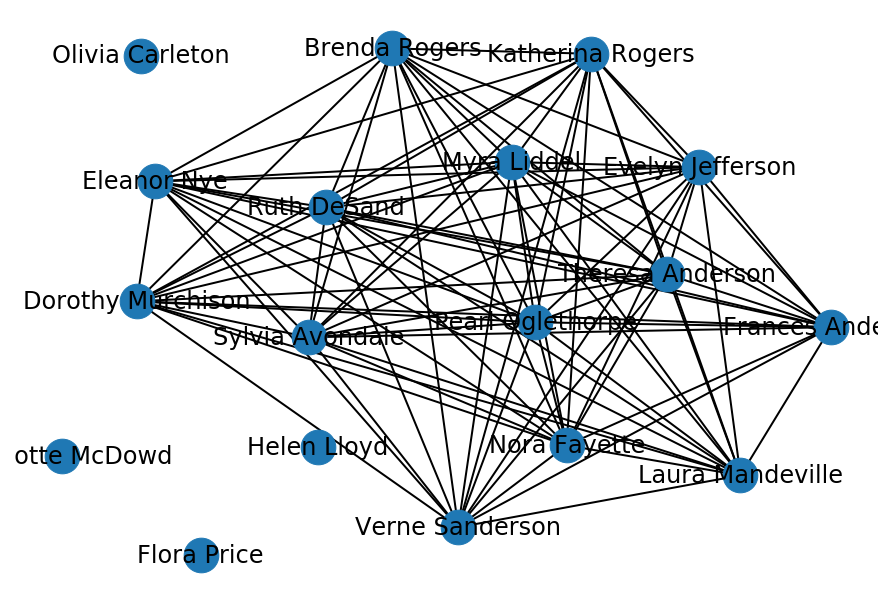

deleting edge: ('Laura Mandeville', 'Dorothy Murchison') ...we have now  5  components
deleting edge: ('Sylvia Avondale', 'Laura Mandeville') ...we have now  5  components
deleting edge: ('Katherina Rogers', 'Laura Mandeville') ...we have now  5  components
deleting edge: ('Evelyn Jefferson', 'Laura Mandeville') ...we have now  5  components
deleting edge: ('Pearl Oglethorpe', 'Laura Mandeville') ...we have now  5  components
deleting edge: ('Ruth DeSand', 'Laura Mandeville') ...we have now  5  components
deleting edge: ('Nora Fayette', 'Laura Mandeville') ...we have now  5  components
deleting edge: ('Eleanor Nye', 'Laura Mandeville') ...we have now  5  components
deleting edge: ('Brenda Rogers', 'Laura Mandeville') ...we have now  5  components
deleting edge: ('Myra Liddel', 'Laura Mandeville') ...we have now  5  components
deleting edge: ('Verne Sanderson', 'Laura Mandeville') ...we have now  5  components
deleting edge: ('Theresa Anderson', 'Laura Mandeville') ...we have now  5  co

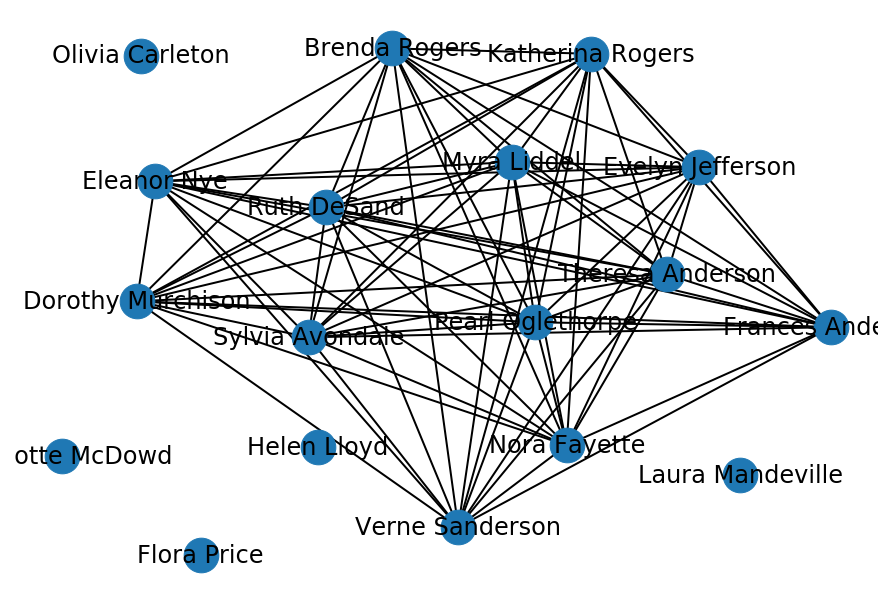

deleting edge: ('Sylvia Avondale', 'Dorothy Murchison') ...we have now  6  components
deleting edge: ('Katherina Rogers', 'Sylvia Avondale') ...we have now  6  components
deleting edge: ('Evelyn Jefferson', 'Sylvia Avondale') ...we have now  6  components
deleting edge: ('Pearl Oglethorpe', 'Sylvia Avondale') ...we have now  6  components
deleting edge: ('Ruth DeSand', 'Sylvia Avondale') ...we have now  6  components
deleting edge: ('Nora Fayette', 'Sylvia Avondale') ...we have now  6  components
deleting edge: ('Eleanor Nye', 'Sylvia Avondale') ...we have now  6  components
deleting edge: ('Brenda Rogers', 'Sylvia Avondale') ...we have now  6  components
deleting edge: ('Myra Liddel', 'Sylvia Avondale') ...we have now  6  components
deleting edge: ('Verne Sanderson', 'Sylvia Avondale') ...we have now  6  components
deleting edge: ('Theresa Anderson', 'Sylvia Avondale') ...we have now  6  components
deleting edge: ('Frances Anderson', 'Sylvia Avondale') ...we have now  7  components
de

In [17]:
Girvan_Newman(G_bottom)

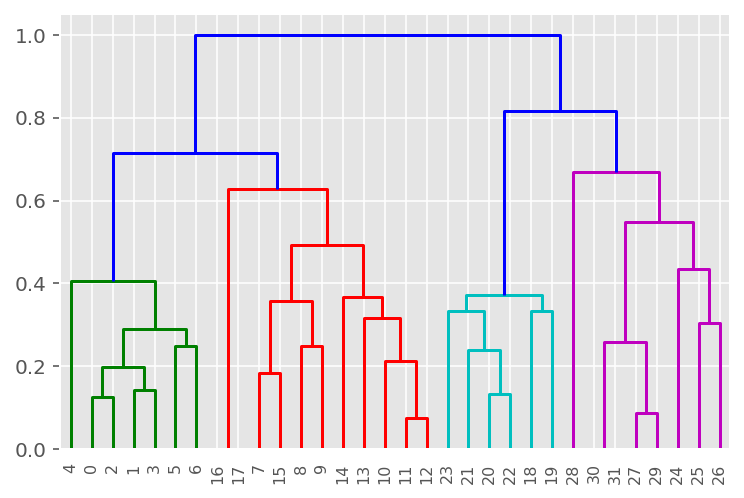

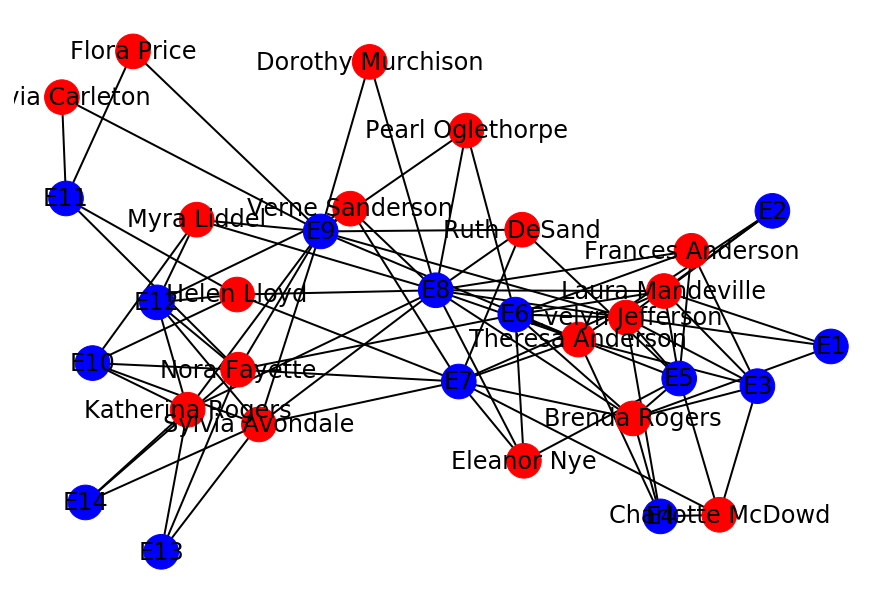

In [18]:
hierarchical_clustering(G, 2)

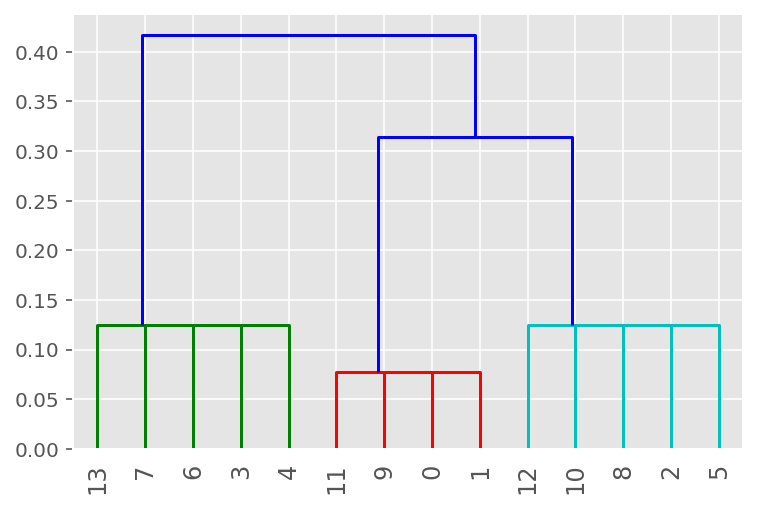

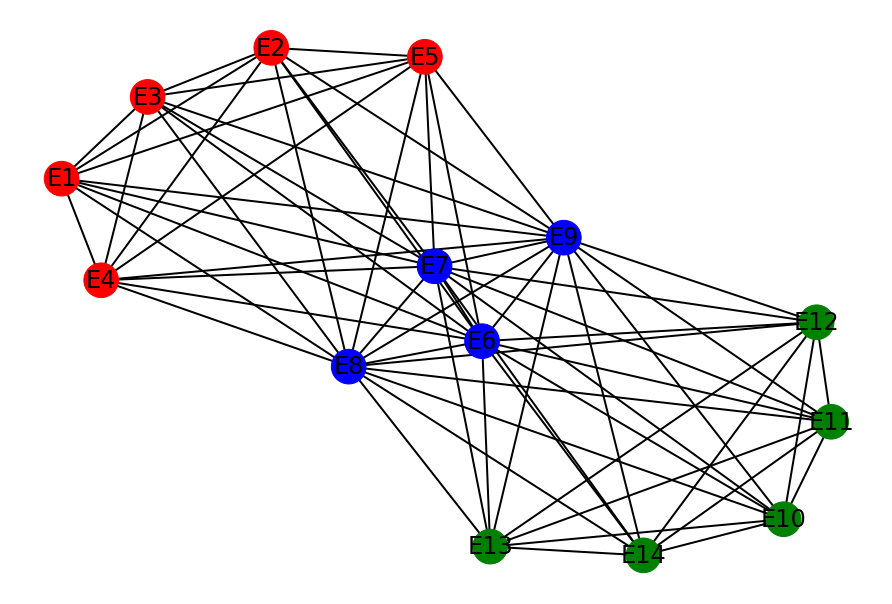

In [19]:
hierarchical_clustering(G_top, 3)

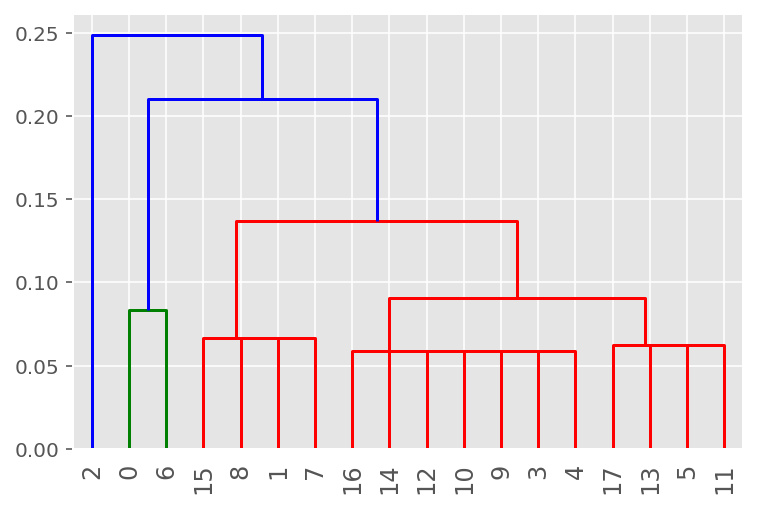

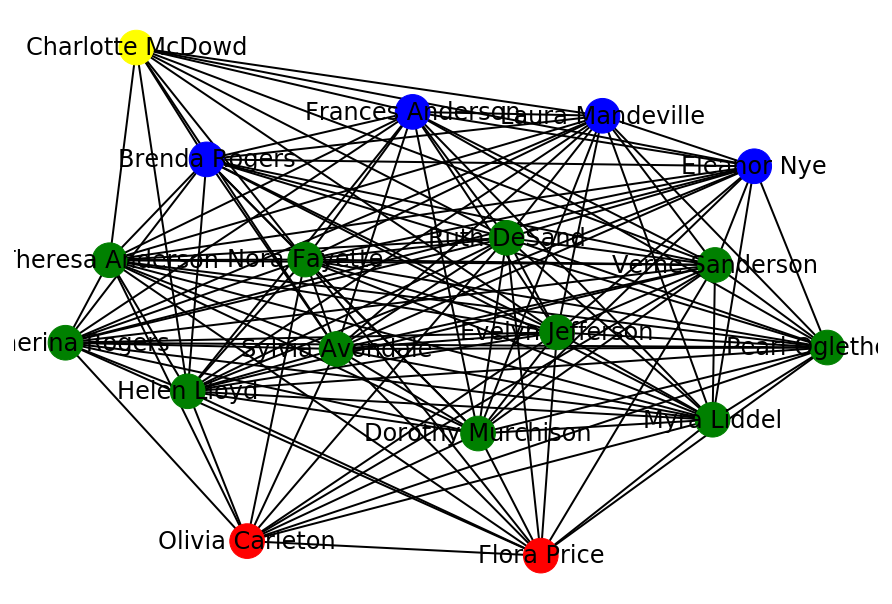

In [20]:
hierarchical_clustering(G_bottom, 4)

In [21]:
print(nx.info(G_top))
print(nx.info(G_bottom))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 66
Average degree:   9.4286
Name: 
Type: Graph
Number of nodes: 18
Number of edges: 139
Average degree:  15.4444


In [22]:
18*17/2

153.0

In [23]:
14*13/2

91.0